<a href="https://colab.research.google.com/github/vannguyenhoai43-hash/ecommerce-category-growth-analysis/blob/main/notebooks/00_all_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **YÊU CẦU**:
**1.** **Theo CAT L1: Auto & Tools**
- Tổng chênh lệch ADO/GMV MTD vs M-1 của ngành Auto và Tools là bao nhiêu?
- Sub-category L2 đang đóng góp lớn nhất vào tổng chênh lệch (giảm/tăng) này?

**2.** **Theo SubCat L2:**

**- Về biến động giảm**
  + Những sub-category L2 nào của Auto/Tools đang có mức giảm mạnh nhất so với M-1?
  + Với mỗi sub-category L2 giảm mạnh đó, sub-category L3 nào đang đóng góp nhiều nhất vào mức giảm?
  + Trong các subcat L3 giảm mạnh, có nhóm sản phẩm cụ thể nào (SKU Group/Product Type) bị giảm đáng kể không?

**- Về biến động tăng:**
  + Có sub-category L2 hoặc L3 nào đang tăng trưởng so với M-1 không?
  + Những nhóm sản phẩm nào đang đóng góp chính vào sự tăng trưởng đó?
  + Có nhóm sản phẩm nào đang lên xu hướng (on-trend) không? Dựa vào chỉ số nào để xác nhận điều đó (VD: tăng trưởng đều, tìm kiếm cao, tỷ lệ click tốt...)?


ADO

- ado_prev
- ado_change/ ado_delta
- ado_change_pct/ ado_gr
- ado_ctrb
- ado_share

GMV
- gmv_prev
- gmv_change/ gmv_detla
- gmv_change_pct/ gmv_gr




## YÊU CẦU
**Phần 1: Tổng quan:**

  - Tổng LV1 tăng/giảm như thế nào qua qua các tháng: ADO, AdGMV MoM
  - Tăng trưởng đến từ volume (ADO) hay value (AdGMV): ADO ↑ nhưng GMV ↓

**Phần 2: Phân tích động lực tăng trưởng:**

  - LV1 tăng trưởng do LV2 nào đóng góp, do sản phẩm nào: diff_ADO/GMV, contrib_ADO/GMV
  - LV2 nào tăng trưởng âm, do sản phẩm nào: diff_ADO/GMV < 0
      - Note: Lấy top 20 sản phẩm có ADO_M_1, sort thấp tới cao diff_ADO, lấy top 3
  - Tăng trưởng có bị phụ thuộc vào số nhỏ LV2 không? -check

**Phần 3: Chất lượng tăng trưởng:**
  - Cơ cấu ADO / AdGMV thay đổi thế nào qua các tháng?
  - LV2 nào tăng trưởng tốt và có quy mô lớn?: diff_ADO lớn + ado_share lớn
  - LV2 nào tăng trưởng cao nhưng base nhỏ?: diff_ADO lớn + ado_share nhỏ
  - LV2 nào đang suy giảm nhanh?: % growth âm mạnh (MoM)

**Phần 4: Xu hướng tăng trưởng ( 3 tháng)**

  - LV2 nào có xu hướng tăng/giảm
  - Items nào có xu hướng tăng/giảm
    - Note: sản phẩm phân tích ba lớp :
        - Lớp 1: diff_ado < 0 liên tiếp > 2 tháng gần nhất
        - Lớp 2: abs(sum(diff_ado)) top down, giảm đủ lớn
        - Lớp 3: Max(share_ado) top down, đóng góp đủ lớn

### Input Raw Data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/python/Quick_Report/Data_by_Month/Sep/data_by_item.csv"
df_source_items = pd.read_csv(path)

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/python/Quick_Report/Data_by_Month/Sep/data_by_level2.csv"
df_source_lv2 = pd.read_csv(path)

### Lấy riêng data tháng hiện tại:

In [ ]:
df_cur_items = df_source_items[df_source_items['year_month'] == '2024-09']

In [ ]:
df_cur_items

,year_month,shop_id,item_id,item_name,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
4,2024-09,90668226,10000500212,Kính lúp đa năng - Có tay kẹp,Tools & Home Improvement,Large tools and equipment,0.051111,0.394361,0.004032,0.141497
12,2024-09,17469488,10001604137,Gương Cầu Chiếu Hậu Xe Máy Chân 10ly Hàng Đẹp ...,Automotive,Motorbike Accessories,1.533333,2.935698,0.732258,1.779260
15,2024-09,17469488,10001605847,Mui Rùa Lót Đuôi Trong xe DREAM TD Cao Cấp [D...,Automotive,Auto Parts & Spares,0.051111,0.111004,0.198194,0.611663
18,2024-09,17469488,10001607397,Cặp Inox Bảo Vệ Lốc Máy TD Lắp Dream Việt Hàng...,Automotive,Motorbike Spare Parts,0.083148,0.630599,0.138810,0.757778
22,2024-09,3075268,10002273942,Miếng chống trượt trên taplo xe hơi,Automotive,Interior Accessories,0.389760,0.812665,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
326637,2024-09,506052884,9990222486,ốc bọc sên bộ (4 cái) xe số hàng chính hãng 90...,Automotive,Motorbike Spare Parts,0.142803,0.811668,0.050633,0.441583
326640,2024-09,96174603,9993034963,Bộ tuýp khẩu chính hãng Kapusi 24 chi tiết hệ...,Automotive,Automotive Care,0.066667,1.900303,NaN,NaN
326641,2024-09,39096692,9993574300,"(Mạ niken) M6 Vít đệm vương miện, vít lắp tủ r...",Tools & Home Improvement,Handtool,0.016667,0.151430,NaN,NaN
326647,2024-09,161835161,9995604076,Keo Dán Cường Lực 2 Mặt 3M Đủ Size - Cuộn Dài ...,Tools & Home Improvement,Accessories,0.109444,0.204346,0.057527,0.116574


In [ ]:
df_cur_lv2 = df_source_lv2[df_source_lv2['year_month'] == '2024-09']

In [ ]:
df_cur_lv2

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
2,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208
5,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016
11,2024-09,Automotive,Bicycle & E-bike Accessories,1620.329208,6667.651448,1563.389860,7742.379013
14,2024-09,Automotive,"Bike, E-bike",138.062586,17159.881344,128.451678,12082.696288
18,2024-09,Automotive,Exterior Accessories,1326.289140,8316.842392,1035.455955,6228.654826
21,2024-09,Automotive,Helmets,3663.657544,18761.345137,3253.422925,17385.787129
24,2024-09,Automotive,Interior Accessories,2087.075546,18776.090594,1727.890254,15687.381033
27,2024-09,Automotive,Motorbike,0.566667,716.843645,0.548388,824.516361
30,2024-09,Automotive,Motorbike Accessories,7021.828669,21699.688309,7300.151734,24771.611622


In [ ]:
# Xác định tháng hiện tại và tháng trước:
cur_month_dt = pd.to_datetime(df_cur_lv2['year_month'].iloc[0])
last_month_dt = cur_month_dt - pd.DateOffset(months=1)

cur_month = f"tháng {cur_month_dt.month}"
last_month = f"tháng {(cur_month_dt - pd.DateOffset(months=1)).month}"

In [ ]:
list(df_cur_lv2.columns)

['year_month',
 'level1_kpi_category',
 'level2_kpi_category',
 'ADO_M',
 'AdGMV_M',
 'ADO_M_1',
 'AdGMV_M_1']

### Hàm định dạng số

In [ ]:
# Format số
def format_num(val):
    """Hàm định dạng số: 1,000,000 hoặc +10%"""
    if pd.isna(val): return "0"
    return f"{val:+,.0f}"
# Format %
def format_pct(val):
    """Hàm định dạng phần trăm"""
    if pd.isna(val): return "0%"
    return f"{val:+.2%}"
# Format về lable
def growth_lable(val):
  if val > 0:
    return "tăng"
  elif val < 0:
    return "giảm"
  else:
    return "ổn định"

##TỔNG QUAN NGÀNH HÀNG

In [ ]:
# Hàm tính tăng trưởng
def _growth(df_cat):

  ado_m = df_cat['ADO_M'].sum()
  ado_m1 = df_cat['ADO_M_1'].sum()
  gmv_m = df_cat['AdGMV_M'].sum()
  gmv_m1 = df_cat['AdGMV_M_1'].sum()

  return {
  'diff_ado' : ado_m - ado_m1,
  'diff_gmv' : gmv_m - gmv_m1,
  'grow_ado' : (ado_m - ado_m1) / ado_m1  if ado_m1 != 0 else 0,
  'grow_gmv':(gmv_m - gmv_m1) / gmv_m1  if gmv_m1 != 0 else 0,
}

### PHÂN TÍCH NGÀNH HÀNG LV1

#### Hàm Tăng trưởng



In [ ]:
# mapping level:
CAT_LEVEL_MAP = {
    'L1': 'level1_kpi_category',
    'L2': 'level2_kpi_category'
}

In [ ]:
# Hàm tăng trưởng theo level cat
def growth_by_level(df, level_col):
    results = []

    for cat, sub_df in df.groupby(level_col):
        res = _growth(sub_df)
        res['category'] = cat
        results.append(res)

    return pd.DataFrame(results)

In [ ]:
# hàm tăng trưởng nhiều level
def growth_by_mul_level(df, level_cols):
    results = []

    base_col = ['ADO_M','ADO_M_1','AdGMV_M','AdGMV_M_1']

    for level_values, sub_df in df.groupby(level_cols):

        # tính growth cho từng group
        res = _growth(sub_df)

        # Giữ lại base col
        for c in base_col:
          res[c]=sub_df[c].sum()

        # gắn lại từng level vào kết quả
        for col, val in zip(level_cols, level_values):
            res[col] = val

        results.append(res)

    return pd.DataFrame(results)

In [ ]:
# Tạo cột text tăng trưởng theo cat_level
l1_growth = growth_by_level(df_cur_lv2, CAT_LEVEL_MAP['L1'])
def gen_text_growth(row):
  return (
      f"**{row['category']}**: "
      f"**ADO** {growth_lable(row['diff_ado'])} {format_num(row['diff_ado'])} "
      f"({format_pct(row['grow_ado'])} MoM), "
      f"**GMV** {growth_lable(row['diff_gmv'])} {format_num(row['diff_gmv'])} "
      f"({format_pct(row['grow_gmv'])} MoM)."
  )
l1_growth['text'] = l1_growth.apply(gen_text_growth, axis=1)
texts_l1 = l1_growth['text'].tolist()
texts_l1

['**Automotive**: **ADO** tăng +859 (+2.79% MoM), **GMV** tăng +3,759 (+2.15% MoM).',
 '**Tools & Home Improvement**: **ADO** tăng +570 (+3.92% MoM), **GMV** tăng +11,967 (+12.49% MoM).']

In [ ]:
# tăng trưởng theo level 1
l1_growth = growth_by_level(df_cur_lv2, CAT_LEVEL_MAP['L1'])
print(l1_growth)

     diff_ado      diff_gmv  grow_ado  grow_gmv                  category
0  859.017071   3759.055211  0.027906  0.021539                Automotive
1  570.146859  11966.501885  0.039242  0.124878  Tools & Home Improvement


In [ ]:
# Bảng ADO/GMV theo tháng của lv1
l1_by_month = (df_source_lv2
              .groupby(['year_month','level1_kpi_category'])
              .agg({'ADO_M':'sum','AdGMV_M':'sum'})
              .reset_index()
              )
l1_by_month

,year_month,level1_kpi_category,ADO_M,AdGMV_M
0,2024-07,Automotive,28612.853177,162052.383981
1,2024-07,Tools & Home Improvement,14404.819563,92790.688823
2,2024-08,Automotive,30782.390456,174524.614914
3,2024-08,Tools & Home Improvement,14529.022784,95825.641870
4,2024-09,Automotive,31641.407527,178283.670125
5,2024-09,Tools & Home Improvement,15099.169643,107792.143755


In [ ]:
diff_ado_overall=l1_growth['diff_ado'].sum()
diff_gmv_overall=l1_growth['diff_gmv'].sum()
grow_ado_overall=l1_growth['grow_ado'].sum()
grow_gmv_overall=l1_growth['grow_gmv'].sum()


In [ ]:
# tăng trưởng theo level 1 + level 2
l1_L2_growth = growth_by_mul_level(df_cur_lv2, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1']])
l1_L2_growth_sort = l1_L2_growth.sort_values('level1_kpi_category')
print(l1_L2_growth_sort)

      diff_ado     diff_gmv  grow_ado  grow_gmv         ADO_M       ADO_M_1  \
8   290.833185  2088.187566  0.280875  0.335255   1326.289140   1035.455955   
1   240.151542  1166.658283  0.236101  0.182195   1257.305894   1017.154352   
2    80.495411  -606.060025  0.044013 -0.059055   1909.389789   1828.894378   
3   -92.698572 -1305.599699 -0.115163 -0.219878    712.234388    804.932960   
4    56.939348 -1074.727565  0.036420 -0.138811   1620.329208   1563.389860   
5     9.610908  5077.185056  0.074821  0.420203    138.062586    128.451678   
14 -278.323065 -3071.923313 -0.038126 -0.124010   7021.828669   7300.151734   
13    0.018279  -107.672716  0.033332 -0.130589      0.566667      0.548388   
15 -217.429876 -2871.259945 -0.017937 -0.042728  11904.668096  12122.097972   
10  410.234619  1375.558008  0.126093  0.079120   3663.657544   3253.422925   
11  359.185292  3088.709561  0.207875  0.196891   2087.075546   1727.890254   
12 -159.927383  1376.460112 -0.039813  0.041144   38

In [ ]:
# tăng trưởng theo level 1 + level 2 + item
item_growth = growth_by_mul_level(df_cur_items, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1'],'item_name'])
item_growth_sort = item_growth.sort_values('level1_kpi_category')
print(item_growth_sort)

        diff_ado   diff_gmv  grow_ado  grow_gmv      ADO_M   ADO_M_1  \
46795   0.018817  -0.025313  0.291664 -0.034671   0.083333  0.064516   
70721  13.252778  11.591015  0.000000  0.000000  13.252778  0.000000   
70720   1.847222   2.422042  0.000000  0.000000   1.847222  0.000000   
70719   0.633333  10.377487  0.000000  0.000000   0.633333  0.000000   
70718  -0.004982  -0.078701 -0.427676 -0.505080   0.006667  0.011649   
...          ...        ...       ...       ...        ...       ...   
37821  -0.004339   1.314513 -0.017638  0.402877   0.241667  0.246006   
37820   0.007614   0.030647  1.652344  0.923186   0.012222  0.004608   
37819   0.027778   0.408595  0.000000  0.000000   0.027778  0.000000   
37825   0.017204   0.024321  1.066650  0.094537   0.033333  0.016129   
93590   0.033333   0.391850  0.000000  0.000000   0.033333  0.000000   

         AdGMV_M  AdGMV_M_1    level2_kpi_category       level1_kpi_category  \
46795   0.704786   0.730099   Interior Accessories     

#### Chart ADO/GMV theo lv1

In [ ]:
import matplotlib.pyplot as plt

def plot_gmv_ado_dual_chart(df):


    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

    categories = ['Automotive', 'Tools & Home Improvement']

    for ax, cat in zip(axes, categories):
        data = df[df['level1_kpi_category'] == cat].sort_values('year_month')

        # Bar chart - GMV
        ax.bar(data['year_month'], data['AdGMV_M'], width=0.5, alpha=0.8)
        ax.set_title(f"{cat} - GMV & ADO")
        ax.set_xlabel("Year-Month")
        ax.set_ylabel("GMV")

        # Line chart - ADO (secondary axis)
        ax2 = ax.twinx()
        ax2.plot(data['year_month'], data['ADO_M'],color='darkorange', marker='o')
        ax2.set_ylabel("ADO")

        # X label xoay cho dễ đọc
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

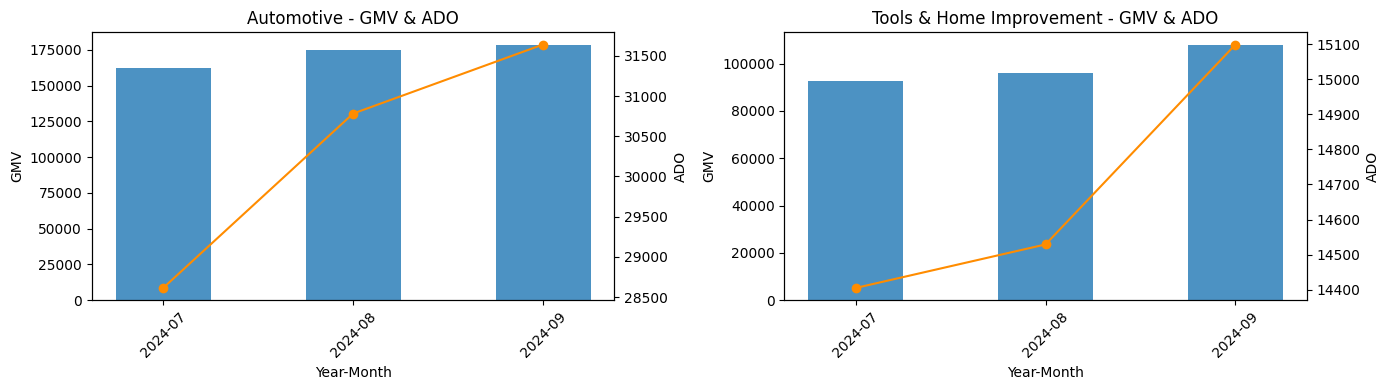

In [ ]:
plot_gmv_ado_dual_chart(l1_by_month)

#### Vẽ chart tăng trưởng cat_level 2

In [ ]:
df_tool = l1_L2_growth[l1_L2_growth['level1_kpi_category'] == 'Tools & Home Improvement']
df_auto = l1_L2_growth[l1_L2_growth['level1_kpi_category'] == 'Automotive']

In [ ]:
def plot_cat(df_cat,cat):
    import matplotlib.pyplot as plt

    df_cat_ado = df_cat.sort_values('diff_ado', ascending=True)
    df_cat_gmv = df_cat.sort_values('diff_gmv', ascending=True)

    fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=120)

    # ===== ADO =====
    colors_cat = ['#2ca02c' if v > 0 else '#d62728' for v in df_cat_ado['diff_ado']]
    axes[0].barh(
        df_cat_ado['level2_kpi_category'],
        df_cat_ado['diff_ado'],
        color= colors_cat
    )
    axes[0].set_title(f'{cat} – ADO Diff', weight='bold')
    axes[0].axvline(0)

    for i, v in enumerate(df_cat_ado['diff_ado']):
        axes[0].text(
            v, i, f'{v:,.0f}',
            va='center',
            ha='left' if v > 0 else 'right',
            fontsize=9
        )

    # ===== GMV =====
    colors_tool = ['#2ca02c' if v > 0 else '#d62728' for v in df_cat_gmv['diff_gmv']]
    axes[1].barh(
        df_cat_gmv['level2_kpi_category'],
        df_cat_gmv['diff_gmv'],
        color=colors_tool
    )
    axes[1].set_title(f'{cat} – GMV Diff', weight='bold')
    axes[1].axvline(0)

    for i, v in enumerate(df_cat_gmv['diff_gmv']):
        axes[1].text(
            v, i, f'{v:,.0f}',
            va='center',
            ha='left' if v > 0 else 'right',
            fontsize=9
        )
    plt.tight_layout()
    plt.show()

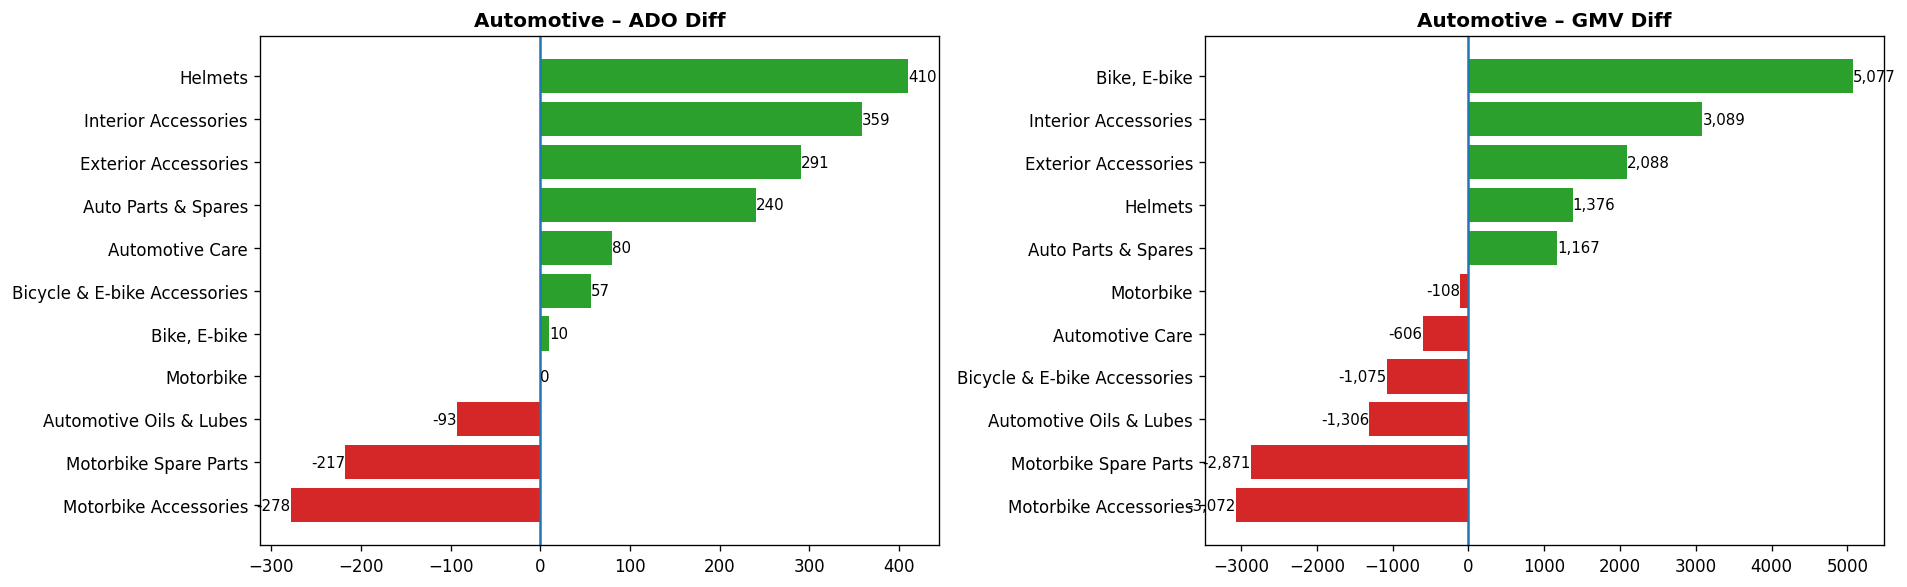

In [ ]:
plot_cat(df_auto,'Automotive')

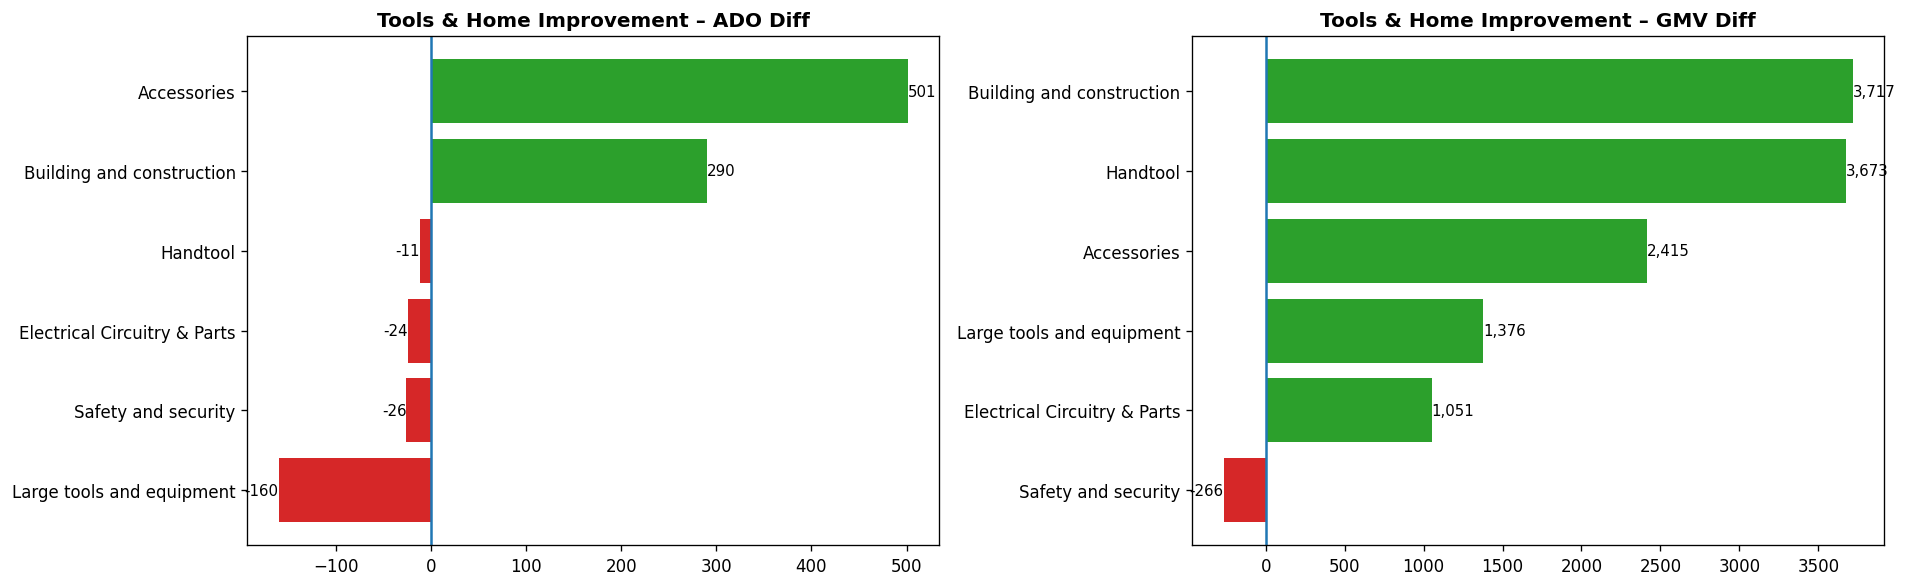

In [ ]:
plot_cat(df_tool,'Tools & Home Improvement')

### PHÂN TÍCH LEVEL 2

#### CAT TĂNG

##### Bảng đóng góp theo mức tăng trưởng

In [ ]:
df_contrib= l1_L2_growth_sort.copy()
# Theo ADO
df_contrib['total_ado_growth'] = df_contrib.groupby('level1_kpi_category')['diff_ado'].transform('sum')
df_contrib['contrib_ado'] = df_contrib['diff_ado']/df_contrib['total_ado_growth']
# Theo GMV
df_contrib['total_gmv_growth'] = df_contrib.groupby('level1_kpi_category')['diff_gmv'].transform('sum')
df_contrib['contrib_gmv'] = df_contrib['diff_gmv']/df_contrib['total_gmv_growth']

In [ ]:
contrib_table = (df_contrib[['level1_kpi_category', 'level2_kpi_category','diff_ado' ,'diff_gmv','contrib_ado', 'contrib_gmv']]
                .sort_values('level1_kpi_category'))
contri_table_display = contrib_table.copy()
contri_table_display['contrib_ado'] = contri_table_display['contrib_ado'].apply(format_pct)
contri_table_display['contrib_gmv'] = contri_table_display['contrib_gmv'].apply(format_pct)

contri_table_display

,level1_kpi_category,level2_kpi_category,diff_ado,diff_gmv,contrib_ado,contrib_gmv
8,Automotive,Exterior Accessories,290.833185,2088.187566,+33.86%,+55.55%
11,Automotive,Interior Accessories,359.185292,3088.709561,+41.81%,+82.17%
10,Automotive,Helmets,410.234619,1375.558008,+47.76%,+36.59%
13,Automotive,Motorbike,0.018279,-107.672716,+0.00%,-2.86%
14,Automotive,Motorbike Accessories,-278.323065,-3071.923313,-32.40%,-81.72%
15,Automotive,Motorbike Spare Parts,-217.429876,-2871.259945,-25.31%,-76.38%
4,Automotive,Bicycle & E-bike Accessories,56.939348,-1074.727565,+6.63%,-28.59%
3,Automotive,Automotive Oils & Lubes,-92.698572,-1305.599699,-10.79%,-34.73%
2,Automotive,Automotive Care,80.495411,-606.060025,+9.37%,-16.12%
1,Automotive,Auto Parts & Spares,240.151542,1166.658283,+27.96%,+31.04%


##### Top 3 contribute cat_level2

In [ ]:
def highest_contrib(df, metric):

    if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'
    elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
    else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

    result = []

    for lvl1, sub_df in df.groupby('level1_kpi_category'):

        # Tổng toàn bộ
        total_contrib = sub_df[contrib_col].sum()
        total_diff = sub_df[diff_col].sum()

        # Top 3
        top3 = (
            sub_df
            .sort_values(contrib_col, ascending=False)
            .head(3)
            [['level1_kpi_category','level2_kpi_category', diff_col, contrib_col]]
        )

        # Tổng top 3
        top3_contrib = top3[contrib_col].sum()
        top3_diff = top3[diff_col].sum()

        # Other = total - top3
        others_row = pd.DataFrame([{
            'level1_kpi_category': lvl1,
            'level2_kpi_category': 'Others',
            diff_col: total_diff - top3_diff,
            contrib_col: total_contrib - top3_contrib
        }])

        result.append(pd.concat([top3, others_row], ignore_index=True))

    return pd.concat(result, ignore_index=True)

In [ ]:
df_top3_l2_ado = (contrib_table
                  .sort_values(by=['level1_kpi_category','diff_ado'],ascending=[True,False])
                  .groupby('level1_kpi_category')
                  .head(3)
                  .assign(contrib_ado= lambda x: x['contrib_ado'].apply(format_pct))
                  [['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']]
)
df_top3_l2_ado

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
10,Automotive,Helmets,410.234619,+47.76%
11,Automotive,Interior Accessories,359.185292,+41.81%
8,Automotive,Exterior Accessories,290.833185,+33.86%
0,Tools & Home Improvement,Accessories,500.957482,+87.86%
6,Tools & Home Improvement,Building and construction,290.342090,+50.92%
9,Tools & Home Improvement,Handtool,-11.312137,-1.98%


In [ ]:
# Bảng đóng góp cao nhất theo ADO:
highest_ado_contrib = highest_contrib (contrib_table,'ado')
highest_ado_contrib .style.format({
    'contrib_ado': format_pct
})

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
0,Automotive,Helmets,410.234619,+47.76%
1,Automotive,Interior Accessories,359.185292,+41.81%
2,Automotive,Exterior Accessories,290.833185,+33.86%
3,Automotive,Others,-201.236025,-23.43%
4,Tools & Home Improvement,Accessories,500.957482,+87.86%
5,Tools & Home Improvement,Building and construction,290.342090,+50.92%
6,Tools & Home Improvement,Handtool,-11.312137,-1.98%
7,Tools & Home Improvement,Others,-209.840576,-36.80%


In [ ]:
# Bảng đóng góp cao nhất theo GMV:
highest_gmv_contrib = highest_contrib (contrib_table,'gmv')
highest_gmv_contrib .style.format({
    'contrib_gmv': format_pct
})

,level1_kpi_category,level2_kpi_category,diff_gmv,contrib_gmv
0,Automotive,"Bike, E-bike",5077.185056,+135.07%
1,Automotive,Interior Accessories,3088.709561,+82.17%
2,Automotive,Exterior Accessories,2088.187566,+55.55%
3,Automotive,Others,-6495.026972,-172.78%
4,Tools & Home Improvement,Building and construction,3716.924910,+31.06%
5,Tools & Home Improvement,Handtool,3672.836328,+30.69%
6,Tools & Home Improvement,Accessories,2415.399676,+20.18%
7,Tools & Home Improvement,Others,2161.340971,+18.06%


##### Vẽ chart pie

In [ ]:
highest_ado_contrib = highest_contrib(contrib_table, 'ado')
highest_gmv_contrib = highest_contrib(contrib_table, 'gmv')

In [ ]:
# Hàm vẽ pie chart
import matplotlib.pyplot as plt

PASTEL_BLUE = ['#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEAF6']

def plot_dual_pie_separate(df_ado, df_gmv, level1_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Filter theo level1
    ado = df_ado[df_ado['level1_kpi_category'] == level1_name]
    gmv = df_gmv[df_gmv['level1_kpi_category'] == level1_name]

    # Pie ADO
    axes[0].pie(
        ado['contrib_ado'],
        labels=ado['level2_kpi_category'],
        autopct='%1.0f%%',
        startangle=90,
        colors=PASTEL_BLUE
    )
    axes[0].set_title(f'{level1_name} - ADO Contribution')

    # Pie GMV
    axes[1].pie(
        gmv['contrib_gmv'],
        labels=gmv['level2_kpi_category'],
        autopct='%1.0f%%',
        startangle=90,
        colors=PASTEL_BLUE
    )
    axes[1].set_title(f'{level1_name} - GMV Contribution')

    plt.tight_layout()
    plt.show()
    return fig

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_waterfall(df_ado, df_gmv, level1_name):
    """
    df: DataFrame gồm category + value (có âm/dương)
    """

    categories = df[category_col].tolist()
    values = df[value_col].tolist()

    # cumulative để xác định đáy cột
    cumulative = np.cumsum([0] + values[:-1])

    # total
    total = sum(values)

    fig, ax = plt.subplots(figsize=(10, 6))

    # vẽ từng cột
    for i in range(len(values)):
        ax.bar(
            categories[i],
            values[i],
            bottom=cumulative[i],
        )

        # label trên cột
        ax.text(
            i,
            cumulative[i] + values[i] / 2,
            f"{values[i]:,.0f}",
            ha='center',
            va='center',
            fontsize=10,
            color='white' if abs(values[i]) > abs(total)*0.05 else 'black'
        )

    # cột total
    ax.bar('Total', total)
    ax.text(
        len(categories),
        total / 2,
        f"{total:,.0f}",
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

    # đường baseline 0
    ax.axhline(0, linewidth=1)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Growth')
    plt.tight_layout()
    plt.show()

    return fig

##### Sản phẩm đóng góp

######Lọc keyword cho items

######Từ đơn

In [ ]:
noise_words = {
    # Đơn vị đo lường & thông số kỹ thuật
    'v', 'w', 'mah', 'ah', 'mm', 'cm', 'm', 'kg', 'g',
    'lít', 'ml', 'inch', 'size',
    '12v', '24v', '220v', '60w', '100w', '120w',

    # Hình thức đóng gói & số lượng
    'cái', 'chiếc', 'viên', 'hộp', 'thùng', 'gói',
    'cặp', 'đôi', 'set', 'lố', 'bịch', 'cuộn',
    'mét', 'tấm', 'miếng', 'sợi',
    'que', 'cây', 'chai', 'lọ', 'tuýp', 'bình','sỉ','lẻ','viền',
    # Vị trí & hướng
    'trước', 'sau', 'trái', 'phải',
    'trên', 'dưới', 'trong', 'ngoài',
    'giữa', 'bên', 'ngang', 'dọc',
    'đứng', 'nằm', 'gầm', 'hậu',

    # Hành động / mục đích
    'dành', 'cho', 'của', 'lắp', 'độ', 'chế',
    'thay', 'thế', 'sửa', 'chữa',
    'làm', 'tẩy', 'rửa', 'xịt', 'bôi',
    'trơn', 'đánh', 'bóng', 'dán', 'ốp',
    'che', 'đựng', 'treo', 'móc', 'giữ', 'nối', 'nhận','cách','ghi','miễn',

    # Tính chất chung
    'chuyên', 'dụng', 'mini', 'nhỏ', 'lớn', 'to',
    'zin', 'xịn', 'nhập', 'khẩu', 'nội', 'địa',
    'loại', 'tốt', 'dày', 'mọi','qsmotor',

    # Màu sắc
    'đen', 'trắng', 'đỏ', 'xanh', 'vàng',
    'bạc', 'tím', 'hồng', 'cam',
    'nâu', 'xám', 'màu', 'trong', 'suốt',

    # Marketing
    'sale', 'off', 'hot', 'new',
    'mới', 'giảm', 'giá', 'rẻ',
    'siêu', 'free', 'freeship',
    'tặng', 'kèm', 'top', 'best', 'trend',

    # Khác
    'phụ', 'kiện', 'linh', 'đồ', 'nghề', 'cụ',
    'thiết', 'bị', 'hơi', 'nước', 'khí', 'nén',
    'nhà', 'cửa', 'gia', 'đình',
    'full', 'nhiều', 'mẫu', 'đủ'
}


###### Từ đôi

In [ ]:
noise_phrases = [
    # Marketing / bán hàng
    'sale off',
    'bán chạy',
    'thanh lý',
    'chính hãng',
    'giá rẻ',
    'cao cấp',
    'hỏa tốc','bảo hành'

    # Thuộc tính / mô tả
    'đa năng',
    'kim loại',
    'chi tiết',
    'khổ rộng',
    'dạng sóng',
    'lấy ánh sáng',
    'hai đầu',
    'dễ thương',
    'đáng yêu',
    'ánh sáng',
    'tự động',

    # Trạng thái / phạm vi
    'ngẫu nhiên',
    'tất cả',
    'bao gồm',
    'hàng loại 1',

    # Thương hiệu / sàn / địa danh
    'shopee',
    'shopee mall',
    'made in',
    'sài gòn',
    'hà nội',
    'ib shop','gù salaya'

    # Năm
    '2017', '2018', '2019',
    '2020', '2021', '2022',
    '2023', '2024', '2025'
]

###### Hàm clean_name

In [ ]:
import re
import pandas as pd
import unicodedata

def clean_and_shorten(name, num_keywords=5):
    if pd.isna(name):
        return ''
    # 1. remove keycap emoji
    name = re.sub(r'[\d]\ufe0f?\u20e3', ' ', name)

    # 2. remove emoji khác
    name = re.sub(r'[\U0001F300-\U0001FAFF]', ' ', name)

    # 3. Normalize unicode nhưng KHÔNG encode ascii
    name = unicodedata.normalize('NFKC', name)

    # 4. Lowercase
    name = name.lower()

    # 5. Bỏ nội dung trong ngoặc
    name = re.sub(r'[\(\[\{].*?[\)\]\}]', ' ', name)

    # 6. Remove phrase trước (sale off, chính hãng...)
    for phrase in noise_phrases:
        name = re.sub(rf'\b{re.escape(phrase)}\b', ' ', name)

    # 7. Replace underscore bằng space
    name = name.replace('_', ' ')

    # 8. Remove emoji & ký tự đặc biệt (GIỮ tiếng Việt)
    name = re.sub(r'[^\w\sàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ]', ' ', name)

    # 9. Split & remove noise word (1 từ)
    words = name.split()
    keywords = [w for w in words if w not in noise_words]

    # 10. Remove duplicate – giữ thứ tự
    seen = set()
    unique_keywords = []
    for w in keywords:
        if w not in seen:
            seen.add(w)
            unique_keywords.append(w)

    return ' '.join(unique_keywords[:num_keywords])

In [ ]:
#Test:
a = '🏆 𝑺𝑨𝑳𝑬 𝑶𝑭𝑭 7️⃣5️⃣% 🔥 #HEO_DẦU 👉 #SỈ_3_CON 📌 Heo FANDO 4pis (Mẫu Bố Hồng) gắn Trước và Sau cho các dòng xe'
clean_and_shorten(a)

'heo dầu 3 con fando'

In [ ]:
item_df = df_cur_items.copy()

In [ ]:
item_df ['keywords']= item_df ['item_name'].apply(clean_and_shorten)
item_df_sort = item_df.sort_values('ADO_M', ascending = False)

In [ ]:
item_df_sort

,year_month,shop_id,item_id,item_name,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,keywords
112258,2024-09,894329151,21277953143,Đèn Trợ Sáng bi cầu mini xe máy xe điện chính...,Automotive,Motorbike Spare Parts,255.526111,423.858556,171.519124,320.507907,đèn trợ sáng bi cầu
183510,2024-09,26715862,23985145206,Mũ Bảo Hiểm 1/2 Nửa Đầu Sơn Đủ Màu Kiểu Dáng N...,Automotive,Helmets,182.728889,432.944721,220.030108,537.021441,mũ bảo hiểm 1 2
319684,2024-09,391641034,9029174634,Mũ bảo hiểm Napoli N120 nửa đầu - Đủ màu - [FR...,Automotive,Helmets,169.825000,1220.051535,156.439247,1118.931796,mũ bảo hiểm napoli n120
205922,2024-09,1199025283,24817609701,Mũ Bảo Hiểm Nửa Đầu 1/2 Sơn Nhám Có Lỗ Thông G...,Automotive,Helmets,159.727778,300.630938,77.516129,158.360104,mũ bảo hiểm nửa đầu
208498,2024-09,1023147465,24911424409,"Tem Tỉnh Thành Việt Nam, Tem Dán Xe Performanc...",Automotive,Motorbike Accessories,148.981482,67.993222,126.879032,65.213478,tem tỉnh thành việt nam
...,...,...,...,...,...,...,...,...,...,...,...
178741,2024-09,906994377,23831905352,Điện trở dán 1206 10R dây 50c chất lượng cao,Tools & Home Improvement,Electrical Circuitry & Parts,0.001667,0.011887,NaN,NaN,điện trở 1206 10r dây
146338,2024-09,906994377,22731915192,Điện trở dán 1206 91R dây 50c chất lượng cao,Tools & Home Improvement,Electrical Circuitry & Parts,0.001667,0.011887,NaN,NaN,điện trở 1206 91r dây
195091,2024-09,708180985,24416390935,Rèm Che Nắng Kính Lái Thông Minh Hiện Đại Và C...,Tools & Home Improvement,Building and construction,0.001667,0.148979,NaN,NaN,rèm nắng kính lái thông
20927,2024-09,67030960,13380287227,IC nguồn OB2226SP chất lượng tốt.,Tools & Home Improvement,Electrical Circuitry & Parts,0.001667,0.038497,0.048387,0.103690,ic nguồn ob2226sp chất lượng


In [ ]:
item_df.to_csv("item_df.csv", index=False, encoding="utf-8-sig")

In [ ]:
# tăng trưởng theo level 1 + level 2 + items
item_growth = growth_by_mul_level(item_df, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1'],'keywords'])
item_growth_sort = item_growth.sort_values('level1_kpi_category')
print(item_growth_sort)

       diff_ado   diff_gmv  grow_ado  grow_gmv     ADO_M   ADO_M_1    AdGMV_M  \
35747 -0.008602  -0.082410 -0.114283 -0.389301  0.066667  0.075269   0.129277   
54726  0.033333   0.025453  0.000000  0.000000  0.033333  0.000000   0.025453   
54725  0.100000   1.264038  0.000000  0.000000  0.100000  0.000000   1.264038   
54724 -0.154570  -1.044196 -0.150131 -0.164245  0.875000  1.029570   5.313344   
54723  0.172939   0.380730  1.649567  1.149211  0.277778  0.104839   0.712027   
...         ...        ...       ...       ...       ...       ...        ...   
29267  0.026379   0.328658  3.270800  2.289167  0.034444  0.008065   0.472229   
29268  0.046093   0.553765  0.173198  0.503931  0.312222  0.266129   1.652655   
29269  2.501715  10.343882  5.000740  3.218139  3.001984  0.500269  13.558125   
29258  0.123387   0.739362  0.136851  0.282364  1.025000  0.901613   3.357831   
71495  0.070370   0.450469  0.000000  0.000000  0.070370  0.000000   0.450469   

       AdGMV_M_1    level2_

#####Lọc theo top level 2


In [ ]:
#Lọc top ado level 2
level2_top_ado_list = (
    highest_ado_contrib
    .loc[highest_ado_contrib['level2_kpi_category'] != 'Others',
         'level2_kpi_category']
    .unique()
    .tolist()
)

level2_top_ado_list

['Helmets',
 'Interior Accessories',
 'Exterior Accessories',
 'Accessories',
 'Building and construction',
 'Handtool']

In [ ]:
#Lọc top gmv level 2
level2_top_gmv_list = (
    highest_gmv_contrib
    .loc[highest_gmv_contrib['level2_kpi_category'] != 'Others',
         'level2_kpi_category']
    .unique()
    .tolist()
)

level2_top_gmv_list

['Bike, E-bike',
 'Interior Accessories',
 'Exterior Accessories',
 'Building and construction',
 'Handtool',
 'Accessories']

In [ ]:
#Filter top level 2 list
df_ado_l1_l2_item = item_growth[
    item_growth['level2_kpi_category'].isin(level2_top_ado_list)
].copy()

In [ ]:
print(df_ado_l1_l2_item)

       diff_ado   diff_gmv  grow_ado  grow_gmv     ADO_M   ADO_M_1    AdGMV_M  \
0     -0.063441  -0.431020 -0.655558 -0.696045  0.033333  0.096774   0.188222   
1     -0.292115  -3.332406 -0.724445 -0.794643  0.111111  0.403226   0.861182   
2      0.537223   5.656433  0.000000  0.000000  0.537223  0.000000   5.656433   
3      0.863889   5.106472  0.000000  0.000000  0.863889  0.000000   5.106472   
4      0.050000   0.276881  0.000000  0.000000  0.050000  0.000000   0.276881   
...         ...        ...       ...       ...       ...       ...        ...   
36867  0.083334   2.125328  0.000000  0.000000  0.083334  0.000000   2.125328   
36868  0.034409   0.117562  1.066681  0.720815  0.066667  0.032258   0.280658   
36869  0.101075   0.634000  3.133331  3.887281  0.133333  0.032258   0.797096   
36870  0.075000  -0.765078  3.000000 -0.565446  0.100000  0.025000   0.587975   
36871  1.085623  12.425304  0.885640  1.167463  2.311429  1.225806  23.068298   

       AdGMV_M_1   level2_k

In [ ]:
#Filter top level 2 list
df_gmv_l1_l2_item = item_growth[
    item_growth['level2_kpi_category'].isin(level2_top_gmv_list)
].copy()

#####Tính total tăng trưởng

In [ ]:
# TÍnh tổng level 2
df_contrib_ado_item= df_ado_l1_l2_item.copy()
# Theo ADO
df_contrib_ado_item['total_ado_grow'] = df_contrib_ado_item.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_ado_item['contrib_ado'] = df_contrib_ado_item['diff_ado']/df_contrib_ado_item['total_ado_grow']
# Theo GMV
df_contrib_ado_item['total_gmv_grow'] = df_contrib_ado_item.groupby(['level2_kpi_category'])['diff_gmv'].transform('sum')
df_contrib_ado_item['contrib_gmv'] = df_contrib_ado_item['diff_gmv']/df_contrib_ado_item['total_gmv_grow']


In [ ]:
# TÍnh tổng level 2
df_contrib_gmv_item= df_gmv_l1_l2_item.copy()
# Theo ADO
df_contrib_gmv_item['total_ado_grow'] = df_contrib_gmv_item.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_gmv_item['contrib_ado'] = df_contrib_gmv_item['diff_ado']/df_contrib_gmv_item['total_ado_grow']
# Theo GMV
df_contrib_gmv_item['total_gmv_grow'] = df_contrib_gmv_item.groupby(['level2_kpi_category'])['diff_gmv'].transform('sum')
df_contrib_gmv_item['contrib_gmv'] = df_contrib_gmv_item['diff_gmv']/df_contrib_gmv_item['total_gmv_grow']

#####Hàm top sp contribute tăng trưởng tốt

In [ ]:
def top3_items (df,metric):
  if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'

  elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
  else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  result= (
                df.sort_values(by =['level1_kpi_category',diff_col], ascending=[True,False])
                .groupby(['level2_kpi_category'])
                .head(3)
  )
  #result[contrib_col] = result[contrib_col].apply(format_pct)
  result = result [['level1_kpi_category','level2_kpi_category', 'keywords', diff_col, contrib_col]]

  return  result

In [ ]:
top3_items_ado =  top3_items(df_contrib_ado_item,'ado')
top3_items_ado_sort = top3_items_ado.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = [True,True])
top3_items_ado_sort

,level1_kpi_category,level2_kpi_category,keywords,diff_ado,contrib_ado
22463,Automotive,Exterior Accessories,combo 4 nắp van bánh,23.312540,0.058617
23349,Automotive,Exterior Accessories,nẹp decal bậc xe ô,22.225852,0.055885
23409,Automotive,Exterior Accessories,quây chống chuột xe ô,14.228616,0.035776
32779,Automotive,Helmets,mũ bảo hiểm nửa đầu,154.379847,0.184231
32742,Automotive,Helmets,mũ bảo hiểm lưỡi trai,123.472188,0.147347
32824,Automotive,Helmets,mũ bảo hiểm đai da,92.927717,0.110896
36855,Automotive,Interior Accessories,đỡ điện thoại ô tô,38.717029,0.071076
33301,Automotive,Interior Accessories,bảng số điện thoại ô,31.688589,0.058174
35857,Automotive,Interior Accessories,thảm lót sàn cao su,21.565134,0.039589
776,Tools & Home Improvement,Accessories,bộ sạc 4 pin aa,86.113333,0.072398


In [ ]:
top3_items_gmv =  top3_items(df_contrib_gmv_item,'gmv')
top3_items_gmv_sort = top3_items_gmv.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = [True,True])
top3_items_gmv_sort

,level1_kpi_category,level2_kpi_category,keywords,diff_gmv,contrib_gmv
11497,Automotive,"Bike, E-bike",xe đạp điện học sinh,1328.606153,0.203994
11500,Automotive,"Bike, E-bike",xe đạp điện moka niceshine,795.039114,0.122070
11324,Automotive,"Bike, E-bike",xe điện 3 bánh super,684.492399,0.105097
23409,Automotive,Exterior Accessories,quây chống chuột xe ô,491.234590,0.172311
23408,Automotive,Exterior Accessories,quây chống chuột rào chắn,173.449046,0.060841
21717,Automotive,Exterior Accessories,bạt phủ ô tô xe,123.681591,0.043384
35245,Automotive,Interior Accessories,màn hình android ô tô,930.211130,0.145398
35877,Automotive,Interior Accessories,thảm lót sàn ô tô,625.937991,0.097838
35857,Automotive,Interior Accessories,thảm lót sàn cao su,361.616191,0.056523
776,Tools & Home Improvement,Accessories,bộ sạc 4 pin aa,671.295274,0.117022


##### Text insight

In [ ]:
def insight_ado_gmv_from_items(
    contrib_ado_df,
    contrib_gmv_df,
    df_ado,
    df_gmv,
    lvl1
):

    # Lọc orthers
    sub_contrib_ado = contrib_ado_df.loc[
    (contrib_ado_df['level1_kpi_category'] == lvl1) &
    (contrib_ado_df['level2_kpi_category'] != 'Others'),
    ['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']].copy()

    sub_contrib_gmv = contrib_gmv_df.loc[
    (contrib_gmv_df['level1_kpi_category'] == lvl1) &
    (contrib_gmv_df['level2_kpi_category'] != 'Others'),
    ['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']].copy()

    # Lọc level 1 trong bảng items
    sub_ado = df_ado[df_ado['level1_kpi_category'] == lvl1].copy()
    sub_gmv = df_gmv[df_gmv['level1_kpi_category'] == lvl1].copy()

    lines = []
    lines.append(f"**Về {lvl1}**")

    # ================= ADO ================

    ado_names = ', '.join(sub_contrib_ado['level2_kpi_category'])
    ado_contrib = sub_contrib_ado['contrib_ado'].sum()

    lines.append(
        f"- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng "
        f" **{ado_names}**, đóng góp {ado_contrib:.1%} tổng mức tăng. Một số sản phẩm tiêu biểu như: \n \n"
    )

    for lvl2 in sub_ado['level2_kpi_category'].unique():

        items = (
            sub_ado[sub_ado['level2_kpi_category'] == lvl2]
            .sort_values('diff_ado', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_ado']:+.2f} ADO)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}")

    # ================= GMV =================

    gmv_names = ', '.join(sub_contrib_gmv['level2_kpi_category'])
    gmv_contrib = sub_contrib_gmv['contrib_gmv'].sum()

    lines.append(
        "\n"
        f"- **GMV**: Tăng trưởng chủ yếu đến từ nhóm "
        f"(**{gmv_names}**), đóng góp {gmv_contrib:.1%} tổng mức tăng. Một số sản phẩm tiêu biểu như:\n \n"
    )

    for lvl2 in sub_gmv['level2_kpi_category'].unique():
        items = (
            sub_gmv[sub_gmv['level2_kpi_category'] == lvl2]
            .sort_values('diff_gmv', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_gmv']:+.2f} GMV)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}")

    return "\n \n".join(lines)

In [ ]:
print(
    insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1="Automotive"
    )
)

**Về Automotive**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Helmets, Interior Accessories, Exterior Accessories**, đóng góp 123.4% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Helmets**: **mũ bảo hiểm nửa đầu** (+154.38 ADO), **mũ bảo hiểm lưỡi trai** (+123.47 ADO), **mũ bảo hiểm đai da** (+92.93 ADO)
 
  - **Interior Accessories**: **đỡ điện thoại ô tô** (+38.72 ADO), **bảng số điện thoại ô** (+31.69 ADO), **thảm lót sàn cao su** (+21.57 ADO)
 
  - **Exterior Accessories**: **combo 4 nắp van bánh** (+23.31 ADO), **nẹp decal bậc xe ô** (+22.23 ADO), **quây chống chuột xe ô** (+14.23 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Bike, E-bike, Interior Accessories, Exterior Accessories**), đóng góp 272.8% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **Bike, E-bike**: **xe đạp điện học sinh** (+1328.61 GMV), **xe đạp điện moka niceshine** (+795.04 GMV), **xe điện 3 bánh super** (+684.49 GMV)
 
  - **Interior Accessories**: **màn hình android 

In [ ]:
highest_ado_contrib

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
0,Automotive,Helmets,410.234619,0.477563
1,Automotive,Interior Accessories,359.185292,0.418135
2,Automotive,Exterior Accessories,290.833185,0.338565
3,Automotive,Others,-201.236025,-0.234263
4,Tools & Home Improvement,Accessories,500.957482,0.878646
5,Tools & Home Improvement,Building and construction,290.342090,0.509241
6,Tools & Home Improvement,Handtool,-11.312137,-0.019841
7,Tools & Home Improvement,Others,-209.840576,-0.368047


In [ ]:
print(
    insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1="Tools & Home Improvement"
    )
)

**Về Tools & Home Improvement**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Accessories, Building and construction, Handtool**, đóng góp 136.8% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Building and construction**: **xi măng dẻo bịt lỗ** (+86.14 ADO), **sàn nhựa giả gỗ sẵn** (+61.50 ADO), **sàn nhựa giả vân gỗ** (+21.72 ADO)
 
  - **Accessories**: **bộ sạc 4 pin aa** (+86.11 ADO), **băng keo điện nano dai** (+68.44 ADO), **keo dính đa năng mạnh** (+60.53 ADO)
 
  - **Handtool**: **máy siết bulong bs iw850n** (+22.70 ADO), **mũi khoan tháp 4 12** (+19.83 ADO), **cờ lê đa năng vặn** (+17.66 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Building and construction, Handtool, Accessories**), đóng góp 81.9% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **Building and construction**: **sàn nhựa giả gỗ sẵn** (+878.86 GMV), **sàn nhựa giả vân gỗ** (+365.99 GMV), **combo 1 36 sàn nhựa** (+283.12 GMV)
 
  - **Accessories**: **bộ sạc 4 pin aa** (+671.3

#### CAT GIẢM

##### Cat level 2 giảm/ tăng trưởng chậm:

In [ ]:
df_lowest_l2_ado = (contrib_table
                  .query("diff_ado < 0")
                  .sort_values(by=['level1_kpi_category','diff_ado'],ascending=[True,True])
                  .groupby('level1_kpi_category')
                  .head(3)
                  #.assign(contrib_ado= lambda x: x['contrib_ado'].apply(format_pct))
                  [['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']]
)
df_lowest_l2_ado

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
14,Automotive,Motorbike Accessories,-278.323065,-0.324002
15,Automotive,Motorbike Spare Parts,-217.429876,-0.253115
3,Automotive,Automotive Oils & Lubes,-92.698572,-0.107912
12,Tools & Home Improvement,Large tools and equipment,-159.927383,-0.280502
16,Tools & Home Improvement,Safety and security,-25.699967,-0.045076
7,Tools & Home Improvement,Electrical Circuitry & Parts,-24.213226,-0.042468


In [ ]:
# Theo ADO
low_grow_ado_cat = df_lowest_l2_ado['level2_kpi_category'].unique()
low_grow_ado_cat

array(['Motorbike Accessories', 'Motorbike Spare Parts',
       'Automotive Oils & Lubes', 'Large tools and equipment',
       'Safety and security', 'Electrical Circuitry & Parts'],
      dtype=object)

In [ ]:
# Bảng theo lowest_l2_ado
df_ado_all_months = df_source_lv2.loc[
    (df_source_lv2['level2_kpi_category'].isin(low_grow_ado_cat))
].copy()
df_ado_all_months

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
6,2024-07,Automotive,Automotive Oils & Lubes,783.097984,5707.391972,NaN,NaN
7,2024-08,Automotive,Automotive Oils & Lubes,804.932960,5937.830016,783.097984,5707.391972
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016
28,2024-07,Automotive,Motorbike Accessories,6777.253008,23415.663317,NaN,NaN
29,2024-08,Automotive,Motorbike Accessories,7300.151734,24771.611622,6777.253008,23415.663317
30,2024-09,Automotive,Motorbike Accessories,7021.828669,21699.688309,7300.151734,24771.611622
31,2024-07,Automotive,Motorbike Spare Parts,11202.591139,62584.391202,NaN,NaN
32,2024-08,Automotive,Motorbike Spare Parts,12122.097972,67197.820063,11202.591139,62584.391202
33,2024-09,Automotive,Motorbike Spare Parts,11904.668096,64326.560118,12122.097972,67197.820063
40,2024-07,Tools & Home Improvement,Electrical Circuitry & Parts,2508.064401,12851.773372,NaN,NaN


In [ ]:
# Trend 3 tháng
def trend_cat_l2 (df,metric,lv1):

    # select biến
    if metric == 'ado':
      metric_M = 'ADO_M'
    elif metric == 'gmv':
      metric_M = 'AdGMV_M'
    else:
      raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

    # tạo bảng pivot
    result = (
        df.pivot_table(
            index=['level1_kpi_category','level2_kpi_category'],
            columns = 'year_month',
            values = metric_M,
            aggfunc ='sum'
        )
        .reset_index()
    )
    result = result[result['level1_kpi_category']== lv1]
    return result

In [ ]:
# Theo GMV
df_lowest_l2_gmv = (contrib_table
                  .query("diff_gmv < 0")
                  .sort_values(by=['level1_kpi_category','diff_gmv'],ascending=[True,True])
                  .groupby('level1_kpi_category')
                  .head(3)
                  #.assign(contrib_gmv= lambda x: x['contrib_ado'].apply(format_pct))
                  [['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']]
)
df_lowest_l2_gmv

,level1_kpi_category,level2_kpi_category,diff_gmv,contrib_gmv
14,Automotive,Motorbike Accessories,-3071.923313,-0.817206
15,Automotive,Motorbike Spare Parts,-2871.259945,-0.763825
3,Automotive,Automotive Oils & Lubes,-1305.599699,-0.347321
16,Tools & Home Improvement,Safety and security,-265.984952,-0.022227


In [ ]:
low_grow_gmv_cat = df_lowest_l2_gmv['level2_kpi_category'].unique()
low_grow_gmv_cat

array(['Motorbike Accessories', 'Motorbike Spare Parts',
       'Automotive Oils & Lubes', 'Safety and security'], dtype=object)

In [ ]:
df_gmv_all_months = df_source_lv2.loc[
    (df_source_lv2['level2_kpi_category'].isin(low_grow_gmv_cat))
].copy()
df_gmv_all_months

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
6,2024-07,Automotive,Automotive Oils & Lubes,783.097984,5707.391972,NaN,NaN
7,2024-08,Automotive,Automotive Oils & Lubes,804.932960,5937.830016,783.097984,5707.391972
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016
28,2024-07,Automotive,Motorbike Accessories,6777.253008,23415.663317,NaN,NaN
29,2024-08,Automotive,Motorbike Accessories,7300.151734,24771.611622,6777.253008,23415.663317
30,2024-09,Automotive,Motorbike Accessories,7021.828669,21699.688309,7300.151734,24771.611622
31,2024-07,Automotive,Motorbike Spare Parts,11202.591139,62584.391202,NaN,NaN
32,2024-08,Automotive,Motorbike Spare Parts,12122.097972,67197.820063,11202.591139,62584.391202
33,2024-09,Automotive,Motorbike Spare Parts,11904.668096,64326.560118,12122.097972,67197.820063
49,2024-07,Tools & Home Improvement,Safety and security,445.899070,2742.801371,NaN,NaN


######Chart Line

In [ ]:
#Chia bảng ADO theo cat l1
auto_trend_ado = trend_cat_l2 (df_ado_all_months,'ado','Automotive')
tool_trend_ado = trend_cat_l2 (df_ado_all_months,'ado','Tools & Home Improvement')

In [ ]:
# #Chia bảng GMV theo cat l1
auto_trend_gmv = trend_cat_l2 (df_gmv_all_months,'gmv','Automotive')
tool_trend_gmv = trend_cat_l2 (df_gmv_all_months,'gmv','Tools & Home Improvement')

In [ ]:
# Hàm vẽ Chart
import matplotlib.pyplot as plt
def plot_trend_cat(df_ado,df_gmv,lvl1):

    # Lấy tất cả cột tháng (df đã pivot sẵn)
    month_cols = df_ado.columns.difference(
        ['level1_kpi_category', 'level2_kpi_category']
    )

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # --- ADO---
    (
        df_ado
        .set_index('level2_kpi_category')[month_cols]
        .T
        .plot(
            ax=axes[0],
            marker='o',
            title=f'ADO Trend - {lvl1}'
        )
    )

    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('ADO')

    # --- GMV ---
    (
        df_gmv
        .set_index('level2_kpi_category')[month_cols]
        .T
        .plot(
            ax=axes[1],
            marker='o',
            title=f'GMV Trend - {lvl1}'
        )
    )

    axes[1].set_xlabel('Month')

    plt.tight_layout()
    plt.show()


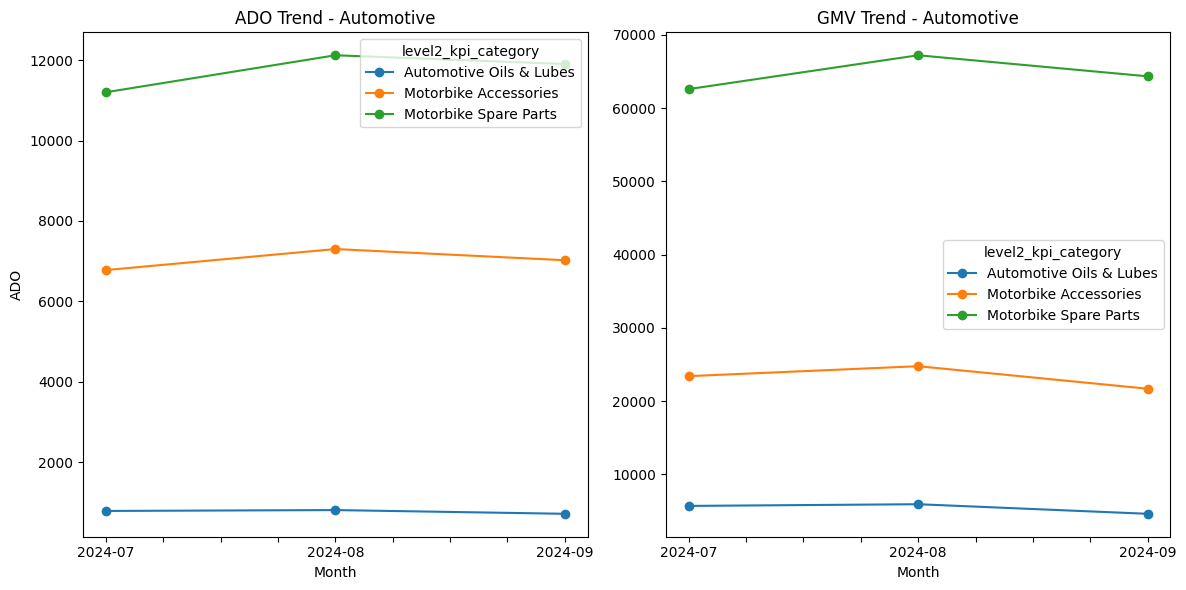

In [ ]:
plot_trend_cat(auto_trend_ado,auto_trend_gmv,"Automotive")

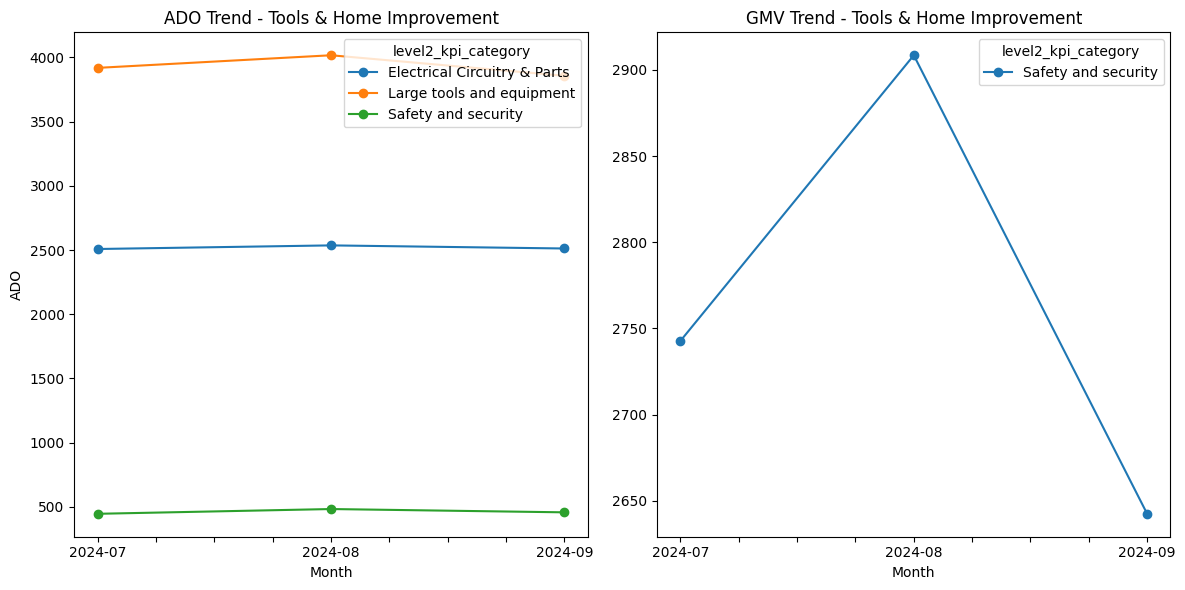

In [ ]:
plot_trend_cat(tool_trend_ado,tool_trend_gmv,"Tools & Home Improvement")

##### Sản phẩm đóng góp

In [ ]:
#Filter low ado level 2 list
df_low_ado_items = item_growth[
    item_growth['level2_kpi_category'].isin(low_grow_ado_cat)
].copy()
df_low_ado_items

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,level2_kpi_category,level1_kpi_category,keywords
8274,-0.094624,-2.838434,-0.586670,-0.442129,0.066666,0.161290,3.581491,6.419925,Automotive Oils & Lubes,Automotive,1 12 dầu nhớt vilube
8275,0.239785,5.346487,1.238892,0.876030,0.433333,0.193548,11.449575,6.103088,Automotive Oils & Lubes,Automotive,1 12 nhớt mobil super
8276,0.232975,11.861597,0.283224,0.442375,1.055556,0.822581,38.675024,26.813427,Automotive Oils & Lubes,Automotive,1 12 nhớt tổng hợp
8277,0.001075,0.078054,0.033325,0.104372,0.033333,0.032258,0.825898,0.747844,Automotive Oils & Lubes,Automotive,1 48 nhớt số horeca
8278,0.036111,0.198236,0.000000,0.000000,0.036111,0.000000,0.198236,0.000000,Automotive Oils & Lubes,Automotive,1 dưỡng sên xe máy
...,...,...,...,...,...,...,...,...,...,...,...
71491,0.033333,0.417571,0.000000,0.000000,0.033333,0.000000,0.417571,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đĩa yeti vuông
71492,0.116667,1.784992,0.000000,0.000000,0.116667,0.000000,1.784992,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đấm việt tiệp
71493,0.008333,0.098733,0.000000,0.000000,0.008333,0.000000,0.098733,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đồng 4p 5p
71494,0.206667,3.336522,0.000000,0.000000,0.206667,0.000000,3.336522,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đồng thau chìa


In [ ]:
#Filter low gmv level 2 list
df_low_gmv_items = item_growth[
    item_growth['level2_kpi_category'].isin(low_grow_gmv_cat)
].copy()
df_low_gmv_items

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,level2_kpi_category,level1_kpi_category,keywords
8274,-0.094624,-2.838434,-0.586670,-0.442129,0.066666,0.161290,3.581491,6.419925,Automotive Oils & Lubes,Automotive,1 12 dầu nhớt vilube
8275,0.239785,5.346487,1.238892,0.876030,0.433333,0.193548,11.449575,6.103088,Automotive Oils & Lubes,Automotive,1 12 nhớt mobil super
8276,0.232975,11.861597,0.283224,0.442375,1.055556,0.822581,38.675024,26.813427,Automotive Oils & Lubes,Automotive,1 12 nhớt tổng hợp
8277,0.001075,0.078054,0.033325,0.104372,0.033333,0.032258,0.825898,0.747844,Automotive Oils & Lubes,Automotive,1 48 nhớt số horeca
8278,0.036111,0.198236,0.000000,0.000000,0.036111,0.000000,0.198236,0.000000,Automotive Oils & Lubes,Automotive,1 dưỡng sên xe máy
...,...,...,...,...,...,...,...,...,...,...,...
71491,0.033333,0.417571,0.000000,0.000000,0.033333,0.000000,0.417571,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đĩa yeti vuông
71492,0.116667,1.784992,0.000000,0.000000,0.116667,0.000000,1.784992,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đấm việt tiệp
71493,0.008333,0.098733,0.000000,0.000000,0.008333,0.000000,0.098733,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đồng 4p 5p
71494,0.206667,3.336522,0.000000,0.000000,0.206667,0.000000,3.336522,0.000000,Safety and security,Tools & Home Improvement,ổ khóa đồng thau chìa


In [ ]:
# TÍnh tổng level 2
df_contrib_low_ado_items = df_low_ado_items.copy()
# Theo ADO
df_contrib_low_ado_items['total_ado_grow'] = df_contrib_low_ado_items.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_low_ado_items['contrib_ado'] = df_contrib_low_ado_items['diff_ado']/df_contrib_low_ado_items['total_ado_grow']

In [ ]:
# TÍnh tổng level 2
df_contrib_low_gmv_items = df_low_gmv_items.copy()
# Theo ADO
df_contrib_low_gmv_items['total_gmv_grow'] = df_contrib_low_gmv_items.groupby('level2_kpi_category')['diff_gmv'].transform('sum')
df_contrib_low_gmv_items['contrib_gmv'] = df_contrib_low_gmv_items['diff_gmv']/df_contrib_low_gmv_items['total_gmv_grow']

In [ ]:
# Hàm tăng trưởng âm
def top3_items_low (df,metric):
  if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'
        col_M = 'ADO_M'
        col_M_1 = 'ADO_M_1'
  elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
        col_M = 'AdGMV_M'
        col_M_1 = 'AdGMV_M_1'
  else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  result = df.sort_values([col_M_1], ascending= False).head(20)
  result= (
                df.sort_values(by =['level1_kpi_category',diff_col], ascending=[True,True])
                .groupby(['level2_kpi_category'])
                .head(3)
  )

  result = result [['level1_kpi_category','level2_kpi_category', 'keywords',col_M,col_M_1, diff_col, contrib_col]]

  return  result

In [ ]:
top3_items_low_ado =  top3_items_low(df_contrib_low_ado_items,'ado')
top3_items_low_ado_sort = top3_items_low_ado.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = True)
top3_items_low_ado_sort

,level1_kpi_category,level2_kpi_category,keywords,ADO_M,ADO_M_1,diff_ado,contrib_ado
8790,Automotive,Automotive Oils & Lubes,mỡ tra bảo dưỡng xe,16.416339,28.637941,-12.221602,-0.074411
9197,Automotive,Automotive Oils & Lubes,vệ sinh sên xích bảo,6.184444,9.636380,-3.451936,-0.021017
8751,Automotive,Automotive Oils & Lubes,mỡ bò bảo dưỡng sên,1.434444,4.373656,-2.939212,-0.017895
48583,Automotive,Motorbike Accessories,gương 5 cạnh rizoma nhôm,76.257434,120.226839,-43.969405,-0.024945
48177,Automotive,Motorbike Accessories,dè fi sirius 50 110,21.193889,40.215054,-19.021165,-0.010791
48755,Automotive,Motorbike Accessories,gương cờ việt nam gắn,4.113334,21.751612,-17.638278,-0.010007
58143,Automotive,Motorbike Spare Parts,cùm tăng tốc domino bao,1.435834,37.627857,-36.192023,-0.012934
68827,Automotive,Motorbike Spare Parts,đèn nháy audi stop cực,29.940782,63.229518,-33.288736,-0.011896
60027,Automotive,Motorbike Spare Parts,gác chân đúc gcraft long,32.656415,56.278354,-23.621939,-0.008442
15459,Tools & Home Improvement,Electrical Circuitry & Parts,công tắc điều khiển từ,123.549212,147.427763,-23.878551,-0.034351


In [ ]:
top3_items_low_gmv =  top3_items_low(df_contrib_low_gmv_items,'gmv')
top3_items_low_gmv_sort = top3_items_low_gmv.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = True)
top3_items_low_gmv_sort

,level1_kpi_category,level2_kpi_category,keywords,AdGMV_M,AdGMV_M_1,diff_gmv,contrib_gmv
8790,Automotive,Automotive Oils & Lubes,mỡ tra bảo dưỡng xe,36.637142,65.880033,-29.242891,-0.026564
8574,Automotive,Automotive Oils & Lubes,dầu nhớt xe máy castrol,28.154019,45.060033,-16.906014,-0.015357
8684,Automotive,Automotive Oils & Lubes,loa sub ghế mbq aw,10.954304,25.283153,-14.328849,-0.013016
52989,Automotive,Motorbike Accessories,động cơ qs 3kv4 và,472.424557,896.054256,-423.629699,-0.109448
48583,Automotive,Motorbike Accessories,gương 5 cạnh rizoma nhôm,207.279258,291.973028,-84.693770,-0.021881
48779,Automotive,Motorbike Accessories,gương gù crg chân gập,114.864719,187.013758,-72.149039,-0.018640
69969,Automotive,Motorbike Spare Parts,động cơ 5000w v4 12,119.888941,297.269863,-177.380922,-0.009006
59152,Automotive,Motorbike Spare Parts,dàn áo bộ vỏ nhựa,195.809343,355.982503,-160.173160,-0.008133
68887,Automotive,Motorbike Spare Parts,đèn pha bi cầu t40,36.225027,149.624786,-113.399759,-0.005758
71264,Tools & Home Improvement,Safety and security,két sắt điện tử xiaomi,55.897910,104.648486,-48.750576,-0.102806


##### Text insight

In [ ]:
# Hàm Insight
def insight_low_ado_gmv_items(
    contrib_ado_df,
    contrib_gmv_df,
    df_ado,
    df_gmv,
    lvl1
):
    # Lọc orthers
    sub_contrib_ado = contrib_ado_df.loc[
    (contrib_ado_df['level1_kpi_category'] == lvl1),
    ['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']].copy()

    sub_contrib_gmv = contrib_gmv_df.loc[
    (contrib_gmv_df['level1_kpi_category'] == lvl1),
    ['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']].copy()

    # Lọc level 1 trong bảng items
    sub_ado = df_ado[df_ado['level1_kpi_category'] == lvl1].copy()
    sub_gmv = df_gmv[df_gmv['level1_kpi_category'] == lvl1].copy()

    lines = []
    lines.append(f"**Về {lvl1}**")

    # ================= ADO ================

    ado_names = ', '.join( sub_contrib_ado['level2_kpi_category'])
    ado_contrib =  sub_contrib_ado['contrib_ado'].sum()

    lines.append(
        f"- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: "
        f"**{ado_names}**, chiếm {ado_contrib:.1%} tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n"
    )

    for lvl2 in sub_ado['level2_kpi_category'].unique():

        items = (
            sub_ado[sub_ado['level2_kpi_category'] == lvl2]
            .sort_values('diff_ado', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_ado']:.2f} ADO)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}.")

    # ================= GMV =================

    gmv_names = ', '.join(sub_contrib_gmv['level2_kpi_category'])
    gmv_contrib = sub_contrib_gmv['contrib_gmv'].sum()

    lines.append(
        "\n"
        f"- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: "
        f"(**{gmv_names}**), chiếm {gmv_contrib:.1%} tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n"
    )

    for lvl2 in sub_gmv['level2_kpi_category'].unique():
        items = (
            sub_gmv[sub_gmv['level2_kpi_category'] == lvl2]
            .sort_values('diff_gmv', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_gmv']:.2f} GMV)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}.")

    return "\n \n".join(lines)

In [ ]:
insight_low_ado_gmv_items(
                             contrib_ado_df= df_lowest_l2_ado,
                             contrib_gmv_df= df_lowest_l2_gmv,
                             df_ado= top3_items_low_ado,
                             df_gmv = top3_items_low_gmv,
                             lvl1="Automotive"
                                        )

'**Về Automotive**\n \n- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Motorbike Accessories, Motorbike Spare Parts, Automotive Oils & Lubes**, chiếm -68.5% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n\n \n  - **Motorbike Accessories**: **gương cờ việt nam gắn** (-17.64 ADO), **dè fi sirius 50 110** (-19.02 ADO), **gương 5 cạnh rizoma nhôm** (-43.97 ADO).\n \n  - **Motorbike Spare Parts**: **gác chân đúc gcraft long** (-23.62 ADO), **đèn nháy audi stop cực** (-33.29 ADO), **cùm tăng tốc domino bao** (-36.19 ADO).\n \n  - **Automotive Oils & Lubes**: **mỡ bò bảo dưỡng sên** (-2.94 ADO), **vệ sinh sên xích bảo** (-3.45 ADO), **mỡ tra bảo dưỡng xe** (-12.22 ADO).\n \n\n- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Motorbike Accessories, Motorbike Spare Parts, Automotive Oils & Lubes**), chiếm -192.8% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n\n \n  - **Motorbike Accessories**: **gương gù crg chân gập** (-72.15 GMV), **gương 5 cạnh r

In [ ]:
insight_low_ado_gmv_items(
                           contrib_ado_df= df_lowest_l2_ado,
                           contrib_gmv_df= df_lowest_l2_gmv,
                           df_ado= top3_items_low_ado,
                           df_gmv = top3_items_low_gmv,
                           lvl1="Tools & Home Improvement"
                                        )

'**Về Tools & Home Improvement**\n \n- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Large tools and equipment, Safety and security, Electrical Circuitry & Parts**, chiếm -36.8% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n\n \n  - **Electrical Circuitry & Parts**: **mạch pin áo điều hòa** (-5.20 ADO), **tụ quạt trần điện 2** (-11.34 ADO), **công tắc điều khiển từ** (-23.88 ADO).\n \n  - **Large tools and equipment**: **vòi tăng áp 3 homefl** (-5.27 ADO), **máy bơm tăng áp cao** (-5.95 ADO), **máy xe cầm tay pin** (-8.22 ADO).\n \n  - **Safety and security**: **combo 2 cháy bột abc** (-1.72 ADO), **khóa chống cắt zsolex** (-1.79 ADO), **ổ khóa bấm việt nhật** (-2.44 ADO).\n \n\n- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Safety and security**), chiếm -2.2% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n\n \n  - **Safety and security**: **combo 2 cháy 4kg cứu** (-29.53 GMV), **combo 2 cháy bột abc** (-35.29 GMV), **két sắt điện tử xia

### PHÂN TÍCH TỶ TRỌNG ADO/GMV



#### Cơ cấu ngành hàng qua các tháng

In [ ]:
df_source_lv2

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
0,2024-07,Automotive,Auto Parts & Spares,942.304522,5881.293915,NaN,NaN
1,2024-08,Automotive,Auto Parts & Spares,1017.154352,6403.356208,942.304522,5881.293915
2,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208
3,2024-07,Automotive,Automotive Care,1854.358966,9847.321101,NaN,NaN
4,2024-08,Automotive,Automotive Care,1828.894378,10262.582355,1854.358966,9847.321101
5,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355
6,2024-07,Automotive,Automotive Oils & Lubes,783.097984,5707.391972,NaN,NaN
7,2024-08,Automotive,Automotive Oils & Lubes,804.932960,5937.830016,783.097984,5707.391972
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016
9,2024-07,Automotive,Bicycle & E-bike Accessories,1530.416494,7318.599107,NaN,NaN


In [ ]:
total_share= df_source_lv2.copy()
#Total share ado
total_share['total_ado_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['ADO_M']
    .transform('sum')
    )
total_share
#Total share gmv
total_share['total_gmv_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['AdGMV_M']
    .transform('sum')
    )
#ADO_share
total_share['ado_share'] = total_share['ADO_M']/total_share['total_ado_share']
total_share['gmv_share'] = total_share['AdGMV_M']/total_share['total_gmv_share']
total_share.style.format({
    'ado_share': '{:.2%}',
    'gmv_share': '{:.2%}'
})


,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
0,2024-07,Automotive,Auto Parts & Spares,942.304522,5881.293915,nan,nan,28612.853177,162052.383981,3.29%,3.63%
1,2024-08,Automotive,Auto Parts & Spares,1017.154352,6403.356208,942.304522,5881.293915,30782.390456,174524.614914,3.30%,3.67%
2,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,3.97%,4.25%
3,2024-07,Automotive,Automotive Care,1854.358966,9847.321101,nan,nan,28612.853177,162052.383981,6.48%,6.08%
4,2024-08,Automotive,Automotive Care,1828.894378,10262.582355,1854.358966,9847.321101,30782.390456,174524.614914,5.94%,5.88%
5,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,6.03%,5.42%
6,2024-07,Automotive,Automotive Oils & Lubes,783.097984,5707.391972,nan,nan,28612.853177,162052.383981,2.74%,3.52%
7,2024-08,Automotive,Automotive Oils & Lubes,804.932960,5937.830016,783.097984,5707.391972,30782.390456,174524.614914,2.61%,3.40%
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,2.25%,2.60%
9,2024-07,Automotive,Bicycle & E-bike Accessories,1530.416494,7318.599107,nan,nan,28612.853177,162052.383981,5.35%,4.52%


In [ ]:
# List month
months = (
    total_share['year_month']
    .dropna()
    .sort_values()
    .unique()
)

prev, cur = months[-2], months[-1]

prev, cur

('2024-08', '2024-09')

In [ ]:
total_share_cur = total_share[total_share['year_month']==cur]
total_share_cur.sort_values(['level1_kpi_category','ado_share'],ascending = [True,False])

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
33,2024-09,Automotive,Motorbike Spare Parts,11904.668096,64326.560118,12122.097972,67197.820063,31641.407527,178283.670125,0.376237,0.360810
30,2024-09,Automotive,Motorbike Accessories,7021.828669,21699.688309,7300.151734,24771.611622,31641.407527,178283.670125,0.221919,0.121714
21,2024-09,Automotive,Helmets,3663.657544,18761.345137,3253.422925,17385.787129,31641.407527,178283.670125,0.115787,0.105233
24,2024-09,Automotive,Interior Accessories,2087.075546,18776.090594,1727.890254,15687.381033,31641.407527,178283.670125,0.065960,0.105316
5,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,0.060345,0.054164
11,2024-09,Automotive,Bicycle & E-bike Accessories,1620.329208,6667.651448,1563.389860,7742.379013,31641.407527,178283.670125,0.051209,0.037399
18,2024-09,Automotive,Exterior Accessories,1326.289140,8316.842392,1035.455955,6228.654826,31641.407527,178283.670125,0.041916,0.046649
2,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,0.039736,0.042461
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,0.022510,0.025982
14,2024-09,Automotive,"Bike, E-bike",138.062586,17159.881344,128.451678,12082.696288,31641.407527,178283.670125,0.004363,0.096250


##### Text insight


In [ ]:
# Gắn tag
def tag_col (row, ado_col=('ado_share','delta_ado'), gmv_col=('gmv_share','delta_gmv')):
  ado= row[ado_col]
  gmv = row[gmv_col]

  if ado == 0 or gmv == 0:
    return 'không thay đổi'
  elif ado>0 and gmv>0:
    return 'tăng cơ cấu'
  elif ado<0 and gmv<0:
    return 'giảm cơ cấu'
  elif ado>0 and gmv<0:
    return 'ADO tăng và GMV giảm'
  elif ado<0 and gmv>0:
    return 'ADO giảm và GMV tăng'
  else:
    return 'no data'

In [ ]:
# Hàm tag col
def tag_share (df,lv1):

  # tạo pivot
  pivot_share = (df[df['level1_kpi_category']== lv1]
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = ['ado_share','gmv_share'],
                      aggfunc = 'sum'
                  )
                )
  # tạo cột tag_col
  pivot_share[('ado_share', 'delta_ado')] = (pivot_share[('ado_share', cur)].fillna(0) - pivot_share[('ado_share', prev)].fillna(0))
  pivot_share[('gmv_share', 'delta_gmv')] = (pivot_share[('gmv_share', cur)].fillna(0)- pivot_share[('gmv_share', prev)].fillna(0))
  pivot_share[('tag','tag_col')]= pivot_share.apply(tag_col,axis=1)

  lines = []
  lines.append(f"**{lv1}**")

  # text insight:
  # Gain share
  gain_df = pivot_share[pivot_share[('tag','tag_col')] == 'tăng cơ cấu']
  gain_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gain_df.iterrows()
    )
  lines.append(f" - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** {gain_text}")
  # Lose share
  losing_df =pivot_share[pivot_share[('tag','tag_col')] == 'giảm cơ cấu']
  losing_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in losing_df.iterrows()
    )
  lines.append(f' - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** {losing_text}')
  # ADO tăng và GMV giảm
  gr_ado_df =pivot_share[pivot_share[('tag','tag_col')] == 'ADO tăng và GMV giảm']
  gr_ado_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gr_ado_df.iterrows()
  )
  lines.append(f' - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** {gr_ado_text}')
  # ADO giảm và GMV tăng
  gr_gmv_df =pivot_share[pivot_share[('tag','tag_col')] == 'ADO giảm và GMV tăng']
  gr_gmv_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gr_gmv_df.iterrows()
  )
  lines.append(f' - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** {gr_gmv_text}')

  return '\n \n'.join(lines)


In [ ]:
tag_share(total_share,"Automotive")

'**Automotive**\n \n - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Auto Parts & Spares** (+0.67pp ADO và +0.58pp GMV), **Bike, E-bike** (+0.02pp ADO và +2.70pp GMV), **Exterior Accessories** (+0.83pp ADO và +1.10pp GMV), **Helmets** (+1.01pp ADO và +0.56pp GMV), **Interior Accessories** (+0.98pp ADO và +1.54pp GMV)\n \n - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Automotive Oils & Lubes** (-0.36pp ADO và -0.80pp GMV), **Motorbike Accessories** (-1.52pp ADO và -2.02pp GMV), **Motorbike Spare Parts** (-1.76pp ADO và -2.42pp GMV)\n \n - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** **Automotive Care** (+0.09pp ADO và -0.46pp GMV), **Bicycle & E-bike Accessories** (+0.04pp ADO và -0.70pp GMV), **Motorbike** (+0.00pp ADO và -0.07pp GMV)\n \n - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** '

In [ ]:
tag_share(total_share,"Tools & Home Improvement")

'**Tools & Home Improvement**\n \n - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Accessories** (+2.57pp ADO và +0.72pp GMV), **Building and construction** (+1.60pp ADO và +2.06pp GMV)\n \n - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Electrical Circuitry & Parts** (-0.82pp ADO và -0.57pp GMV), **Large tools and equipment** (-2.10pp ADO và -2.60pp GMV), **Safety and security** (-0.30pp ADO và -0.58pp GMV)\n \n - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** \n \n - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** **Handtool** (-0.95pp ADO và +0.97pp GMV)'

##### Chart heatmap

In [ ]:
#hàm vẽ chart heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_share(df,lv1):

# pivot
  heatmap_ado_df = (
            df[df['level1_kpi_category'] == lv1]
            .pivot_table(
               index = 'level2_kpi_category',
               columns = 'year_month',
               values = 'ado_share',
               aggfunc = 'sum'
              )
)

  heatmap_gmv_df = (
            df[df['level1_kpi_category'] == lv1]
            .pivot_table(
               index = 'level2_kpi_category',
               columns = 'year_month',
               values = 'gmv_share',
               aggfunc = 'sum'
              )
)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#----ADO----------

  sns.heatmap(
        heatmap_ado_df,
        cmap='Blues',
        annot=True,
        fmt='.1%',
        linewidths=0.5,
        ax=axes[0]
    )
  axes[0].set_title(f'{lv1} – ADO_share', weight='bold')
  axes[0].set_xlabel('Month')
  axes[0].set_ylabel('level2_category')

#----GMV----------

  sns.heatmap(
        heatmap_gmv_df,
        cmap='Blues',
        annot=True,
        fmt='.1%',
        linewidths=0.5,
        ax=axes[1]
    )
  axes[1].set_title(f'{lv1} – GMV_share', weight='bold')
  axes[1].set_xlabel('Month')

  plt.tight_layout()
  plt.show()

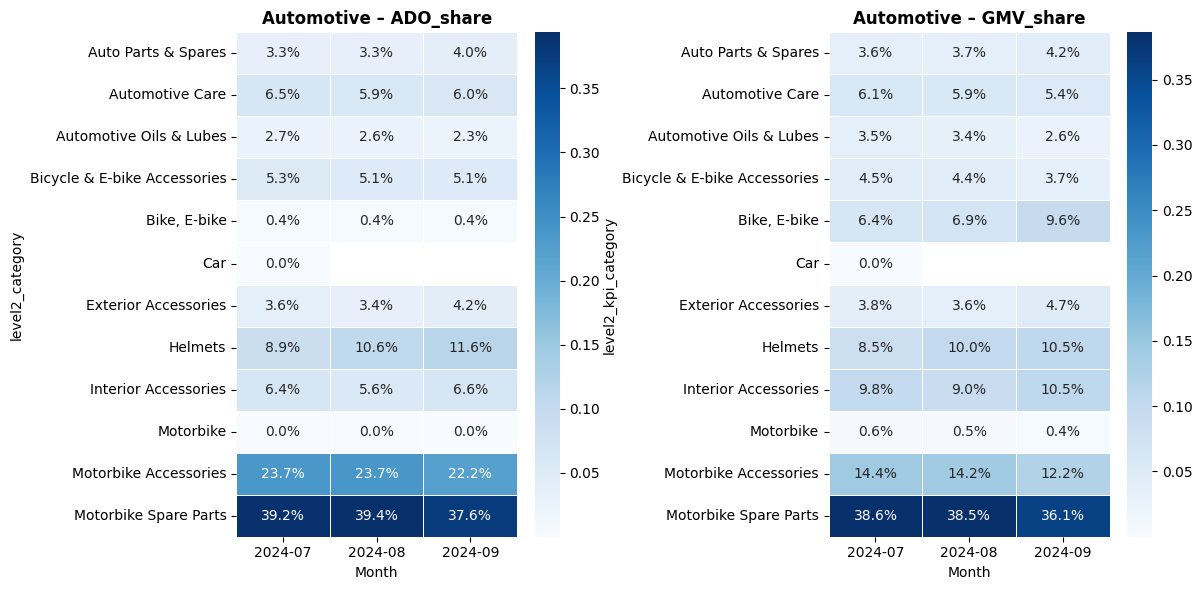

In [ ]:
plot_heatmap_share(
    total_share,
    lv1='Automotive'
)

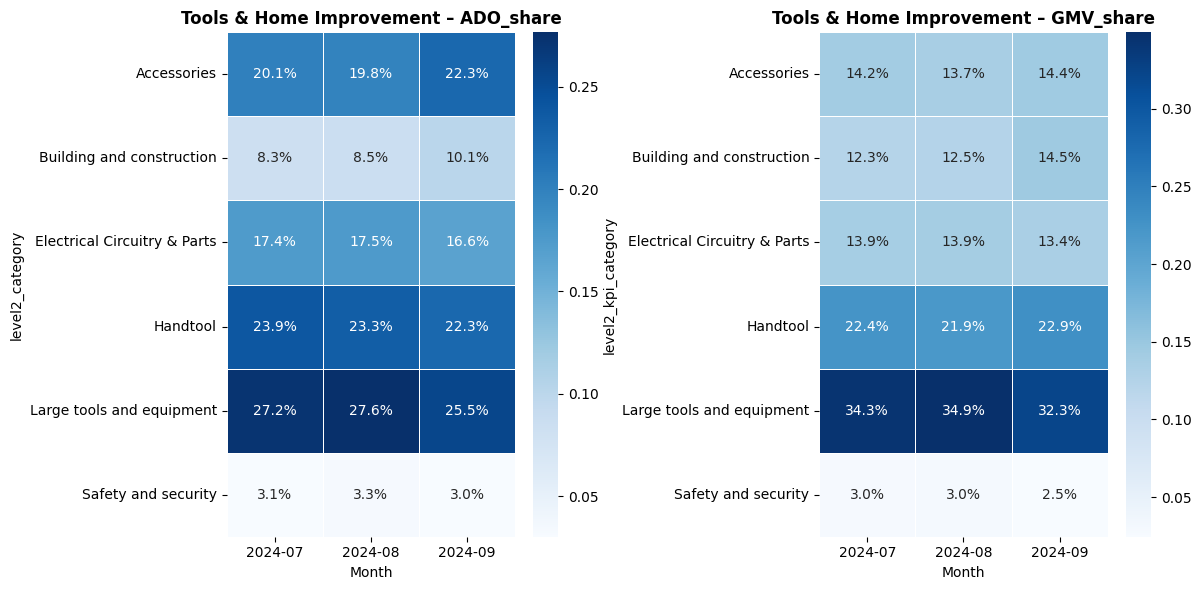

In [ ]:
plot_heatmap_share(
    total_share,
    lv1='Tools & Home Improvement'
)

#### Tỷ trọng và tăng trưởng cao:

In [ ]:
df_merge_share = pd.merge(
    total_share_cur,
    l1_L2_growth[['level2_kpi_category','diff_ado','diff_gmv','grow_ado','grow_gmv']],
    on = 'level2_kpi_category',
    how = 'left'

)
df_merge_share

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,0.039736,0.042461,240.151542,1166.658283,0.236101,0.182195
1,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,0.060345,0.054164,80.495411,-606.060025,0.044013,-0.059055
2,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,0.022510,0.025982,-92.698572,-1305.599699,-0.115163,-0.219878
3,2024-09,Automotive,Bicycle & E-bike Accessories,1620.329208,6667.651448,1563.389860,7742.379013,31641.407527,178283.670125,0.051209,0.037399,56.939348,-1074.727565,0.036420,-0.138811
4,2024-09,Automotive,"Bike, E-bike",138.062586,17159.881344,128.451678,12082.696288,31641.407527,178283.670125,0.004363,0.096250,9.610908,5077.185056,0.074821,0.420203
5,2024-09,Automotive,Exterior Accessories,1326.289140,8316.842392,1035.455955,6228.654826,31641.407527,178283.670125,0.041916,0.046649,290.833185,2088.187566,0.280875,0.335255
6,2024-09,Automotive,Helmets,3663.657544,18761.345137,3253.422925,17385.787129,31641.407527,178283.670125,0.115787,0.105233,410.234619,1375.558008,0.126093,0.079120
7,2024-09,Automotive,Interior Accessories,2087.075546,18776.090594,1727.890254,15687.381033,31641.407527,178283.670125,0.065960,0.105316,359.185292,3088.709561,0.207875,0.196891
8,2024-09,Automotive,Motorbike,0.566667,716.843645,0.548388,824.516361,31641.407527,178283.670125,0.000018,0.004021,0.018279,-107.672716,0.033332,-0.130589
9,2024-09,Automotive,Motorbike Accessories,7021.828669,21699.688309,7300.151734,24771.611622,31641.407527,178283.670125,0.221919,0.121714,-278.323065,-3071.923313,-0.038126,-0.124010


##### Hàm phân vị

In [ ]:
 check_tool = df_merge_share[df_merge_share['level1_kpi_category']=='Tools & Home Improvement']
 check_tool_1 = check_tool[check_tool['ado_share']>0]
 check= check_tool_1['ado_share'].quantile(0.7)
 check

np.float64(0.22331731546994182)

In [ ]:
 check_tool = df_merge_share[df_merge_share['level1_kpi_category']=='Tools & Home Improvement']
 check_tool_1 = check_tool[check_tool['diff_ado']>0]
 check= check_tool['diff_ado'].quantile(0.7)
 check

np.float64(139.5149765)

In [ ]:
 check_auto = df_merge_share[df_merge_share['level1_kpi_category']=='Automotive']
 check_auto_1 = check_auto[check_auto['ado_share']>0]
 check= check_auto_1['ado_share'].quantile(0.7)
 check

np.float64(0.06596026248892604)

In [ ]:
 check_auto = df_merge_share[df_merge_share['level1_kpi_category']=='Automotive']
 check_auto_1 = check_auto[check_auto['diff_ado']>0]
 check= check_auto['diff_ado'].quantile(0.7)
 check

np.float64(240.15154200000006)

In [ ]:
# Hàm phân vị
def quantile_share_diff (df,lv1,metric):

  if metric == 'ado':
    share_col = 'ado_share'
    diff_col = 'diff_ado'
  elif metric == 'gmv':
    share_col = 'gmv_share'
    diff_col = 'diff_gmv'
  else:
    raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  df_lv1 = df[df['level1_kpi_category']== lv1]

  q_share = df_lv1[share_col].quantile(0.6)

  df_pos = df_lv1[df_lv1[diff_col]>0]
  if df_pos.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff = df_pos[diff_col].quantile(0.6)

  df_quantile = df_lv1[
      (df_lv1[share_col]>= q_share)&
      (df_lv1[diff_col]>= q_diff)
  ]
  return df_quantile.reset_index(drop=True)

In [ ]:
quantile_share_diff(df_merge_share,'Tools & Home Improvement','ado')

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Tools & Home Improvement,Accessories,3373.615984,15558.73671,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.14434,500.957482,2415.399676,0.174388,0.183774


In [ ]:
quantile_share_diff(df_merge_share,'Automotive','ado')

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Automotive,Helmets,3663.657544,18761.345137,3253.422925,17385.787129,31641.407527,178283.670125,0.115787,0.105233,410.234619,1375.558008,0.126093,0.079120
1,2024-09,Automotive,Interior Accessories,2087.075546,18776.090594,1727.890254,15687.381033,31641.407527,178283.670125,0.065960,0.105316,359.185292,3088.709561,0.207875,0.196891


##### Text Insight

In [ ]:
# Hàm phân vị cơ cấu và tăng trưởng cao
def quantile_share_diff (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  if df_pos_ado.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_pos_ado['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share']>= q_share_ado)&
      (df_lv1['diff_ado']>= q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"và tăng trưởng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  if df_pos_gmv.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_pos_gmv['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']>= q_share_gmv)&
      (df_lv1['diff_gmv']>= q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"và tăng trưởng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là {quantile_gmv_text}.")
  return lines

In [ ]:
quantile_share_diff(df_merge_share,'Tools & Home Improvement')

['**Tools & Home Improvement**',
 '  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Accessories** (chiếm 22.34% cơ cấu ADO và tăng trưởng +17.44% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Handtool** (chiếm 22.90% cơ cấu GMV và tăng trưởng +17.48% MoM ).']

In [ ]:
quantile_share_diff(df_merge_share,'Automotive')

['**Automotive**',
 '  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Helmets** (chiếm 11.58% cơ cấu ADO và tăng trưởng +12.61% MoM ), **Interior Accessories** (chiếm 6.60% cơ cấu ADO và tăng trưởng +20.79% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Interior Accessories** (chiếm 10.53% cơ cấu GMV và tăng trưởng +19.69% MoM ).']

#### Tỷ trọng nhỏ, tăng trưởng tốt:

In [ ]:
# Hàm phân vị tăng trưởng cao, cơ cấu nhỏ:
def quantile_share_diff_2 (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  #df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  #if df_pos_ado.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_lv1['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share'] < q_share_ado)&
      (df_lv1['diff_ado']>= q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"và tăng trưởng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  #df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  #if df_pos_gmv.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_lv1['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']< q_share_gmv)&
      (df_lv1['diff_gmv']>= q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"và tăng trưởng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là {quantile_gmv_text}.")
  return lines

In [ ]:
quantile_share_diff_2(df_merge_share,'Tools & Home Improvement')

['**Tools & Home Improvement**',
 '  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Building and construction** (chiếm 10.13% cơ cấu ADO và tăng trưởng +23.44% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Building and construction** (chiếm 14.53% cơ cấu GMV và tăng trưởng +31.11% MoM ).']

In [ ]:
quantile_share_diff_2(df_merge_share,'Automotive')

['**Automotive**',
 '  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Auto Parts & Spares** (chiếm 3.97% cơ cấu ADO và tăng trưởng +23.61% MoM ), **Exterior Accessories** (chiếm 4.19% cơ cấu ADO và tăng trưởng +28.09% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Bike, E-bike** (chiếm 9.63% cơ cấu GMV và tăng trưởng +42.02% MoM ), **Exterior Accessories** (chiếm 4.66% cơ cấu GMV và tăng trưởng +33.53% MoM ).']

#### Tỷ trọng cao, tăng trưởng âm:

In [ ]:
# Hàm phân vị tăng trưởng cao, cơ cấu nhỏ:
def quantile_share_diff_3 (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  #df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  #if df_pos_ado.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_lv1['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share'] >= q_share_ado)&
      (df_lv1['diff_ado']< q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"nhưng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  #df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  #if df_pos_gmv.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_lv1['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']>=q_share_gmv)&
      (df_lv1['diff_gmv']< q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"nhưng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là {quantile_gmv_text}.")
  return lines

In [ ]:
quantile_share_diff_3(df_merge_share,'Tools & Home Improvement')

['**Tools & Home Improvement**',
 '  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Large tools and equipment** (chiếm 25.54% cơ cấu ADO nhưng -3.98% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Large tools and equipment** (chiếm 32.31% cơ cấu GMV nhưng +4.11% MoM ).']

In [ ]:
quantile_share_diff_3(df_merge_share,'Automotive')

['**Automotive**',
 '  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Motorbike Accessories** (chiếm 22.19% cơ cấu ADO nhưng -3.81% MoM ), **Motorbike Spare Parts** (chiếm 37.62% cơ cấu ADO nhưng -1.79% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Motorbike Accessories** (chiếm 12.17% cơ cấu GMV nhưng -12.40% MoM ), **Motorbike Spare Parts** (chiếm 36.08% cơ cấu GMV nhưng -4.27% MoM ).']

### PHÂN TÍCH XU HƯỚNG

#### Theo ngành hàng cấp 2

In [ ]:
# DF của last month
df_source_lv2_2 = df_source_lv2.copy()
#df_prev_lv2 = df_source_lv2_2[df_source_lv2_2['year_month']!= cur]
df_lv2_valid = df_source_lv2_2.dropna(subset=['ADO_M_1'])
df_lv2_valid

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
1,2024-08,Automotive,Auto Parts & Spares,1017.154352,6403.356208,942.304522,5881.293915
2,2024-09,Automotive,Auto Parts & Spares,1257.305894,7570.014491,1017.154352,6403.356208
4,2024-08,Automotive,Automotive Care,1828.894378,10262.582355,1854.358966,9847.321101
5,2024-09,Automotive,Automotive Care,1909.389789,9656.522330,1828.894378,10262.582355
7,2024-08,Automotive,Automotive Oils & Lubes,804.932960,5937.830016,783.097984,5707.391972
8,2024-09,Automotive,Automotive Oils & Lubes,712.234388,4632.230317,804.932960,5937.830016
10,2024-08,Automotive,Bicycle & E-bike Accessories,1563.389860,7742.379013,1530.416494,7318.599107
11,2024-09,Automotive,Bicycle & E-bike Accessories,1620.329208,6667.651448,1563.389860,7742.379013
13,2024-08,Automotive,"Bike, E-bike",128.451678,12082.696288,101.608110,10418.906536
14,2024-09,Automotive,"Bike, E-bike",138.062586,17159.881344,128.451678,12082.696288


In [ ]:
df_lv2_gr_month= growth_by_mul_level(df_lv2_valid, ['year_month',CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1']] )

In [ ]:
df_lv2_gr_month.sort_values(by=['year_month','level1_kpi_category','level2_kpi_category'])

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,year_month,level2_kpi_category,level1_kpi_category
1,74.849830,522.062293,0.079433,0.088767,1017.154352,942.304522,6403.356208,5881.293915,2024-08,Auto Parts & Spares,Automotive
2,-25.464588,415.261254,-0.013732,0.042170,1828.894378,1854.358966,10262.582355,9847.321101,2024-08,Automotive Care,Automotive
3,21.834976,230.438044,0.027883,0.040375,804.932960,783.097984,5937.830016,5707.391972,2024-08,Automotive Oils & Lubes,Automotive
4,32.973366,423.779906,0.021545,0.057905,1563.389860,1530.416494,7742.379013,7318.599107,2024-08,Bicycle & E-bike Accessories,Automotive
5,26.843568,1663.789752,0.264187,0.159689,128.451678,101.608110,12082.696288,10418.906536,2024-08,"Bike, E-bike",Automotive
8,-8.681889,15.566385,-0.008315,0.002505,1035.455955,1044.137844,6228.654826,6213.088441,2024-08,Exterior Accessories,Automotive
10,696.891445,3572.134201,0.272593,0.258594,3253.422925,2556.531480,17385.787129,13813.652928,2024-08,Helmets,Automotive
11,-92.260149,-256.772729,-0.050688,-0.016105,1727.890254,1820.150403,15687.381033,15944.153762,2024-08,Interior Accessories,Automotive
13,0.161290,-83.402482,0.416665,-0.091861,0.548388,0.387098,824.516361,907.918843,2024-08,Motorbike,Automotive
14,522.898726,1355.948305,0.077155,0.057908,7300.151734,6777.253008,24771.611622,23415.663317,2024-08,Motorbike Accessories,Automotive


##### Xu hướng tăng

In [ ]:
df_check = (
    df_lv2_gr_month
    .pivot_table(
        index='level2_kpi_category',
        columns='year_month',
        values='diff_ado',
        aggfunc='sum'
    )
)
df_check

year_month,2024-08,2024-09
level2_kpi_category,,
Accessories,-15.810304,500.957482
Auto Parts & Spares,74.849830,240.151542
Automotive Care,-25.464588,80.495411
Automotive Oils & Lubes,21.834976,-92.698572
Bicycle & E-bike Accessories,32.973366,56.939348
"Bike, E-bike",26.843568,9.610908
Building and construction,38.677657,290.342090
Electrical Circuitry & Parts,28.170015,-24.213226
Exterior Accessories,-8.681889,290.833185


In [ ]:
# Hàm xu hướng tăng:
def trend_grow(df,lv1):
  lines =[]
  df_cat = df[df['level1_kpi_category']==lv1]
  lines.append(f"**{lv1}** \n\n")
  #----------ADO
  # Tạo pivot
  df_month_ado = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_ado',
                      aggfunc = 'sum'
                  ))
  df_month_gmv = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_gmv',
                      aggfunc = 'sum'
                  ))
  # Text
  ado_text =[]
  for lv2, row in df_month_ado.iterrows():
    if not (row.dropna()>0).all():
      continue
    note = [
        f"T{int(m.split('-')[1])} {row[m]:+.2f} ADO"
        for m in row.index
    ]
    ado_text.append(f"**{lv2}** ({', '.join(note)})")
  if ado_text:
    lines.append(
    f" - **ADO**: Ngành hàng có xu hướng tăng "
    f'{", ".join(ado_text)}.'
    )
  else:
    lines.append(
    f"**ADO**: Không có ngành hàng nào có xu hướng tăng."
    )
  #----------GMV
  gmv_text = []
  for lv2,row in df_month_gmv.iterrows():
    if not (row.dropna() >0).all():
      continue
    note_gmv = [
        f"T{int(m.split('-')[1])} {row[m]:+.2f} GMV"
        for m in row.index
    ]
    gmv_text.append(f"**{lv2}** ({', '.join(note_gmv)})")
  if gmv_text:
            lines.append(
            f" - **GMV**: Ngành hàng có xu hướng tăng "
            f'{", ".join(gmv_text)}.'
            )
  else:
            lines.append(
            f"**GMV**: Không có ngành hàng nào có xu hướng tăng."
            )
  return lines


In [ ]:
trend_grow(df_lv2_gr_month,"Automotive")

['**Automotive** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng tăng **Auto Parts & Spares** (T8 +74.85 ADO, T9 +240.15 ADO), **Bicycle & E-bike Accessories** (T8 +32.97 ADO, T9 +56.94 ADO), **Bike, E-bike** (T8 +26.84 ADO, T9 +9.61 ADO), **Helmets** (T8 +696.89 ADO, T9 +410.23 ADO), **Motorbike** (T8 +0.16 ADO, T9 +0.02 ADO).',
 ' - **GMV**: Ngành hàng có xu hướng tăng **Auto Parts & Spares** (T8 +522.06 GMV, T9 +1166.66 GMV), **Bike, E-bike** (T8 +1663.79 GMV, T9 +5077.19 GMV), **Exterior Accessories** (T8 +15.57 GMV, T9 +2088.19 GMV), **Helmets** (T8 +3572.13 GMV, T9 +1375.56 GMV).']

In [ ]:
trend_grow(df_lv2_gr_month,"Tools & Home Improvement")

['**Tools & Home Improvement** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng tăng **Building and construction** (T8 +38.68 ADO, T9 +290.34 ADO).',
 ' - **GMV**: Ngành hàng có xu hướng tăng **Building and construction** (T8 +548.22 GMV, T9 +3716.92 GMV), **Electrical Circuitry & Parts** (T8 +508.24 GMV, T9 +1050.87 GMV), **Handtool** (T8 +253.21 GMV, T9 +3672.84 GMV), **Large tools and equipment** (T8 +1626.14 GMV, T9 +1376.46 GMV).']

##### Xu hướng giảm

In [ ]:
# Hàm xu hướng giảm
def trend_down(df,lv1):
  lines = []
  df_cat = df[df['level1_kpi_category']==lv1]
  lines.append(f'**{lv1}** \n\n')

  #ADO
  df_month_ado = (df_cat
                  .pivot_table(
                      index ='level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_ado',
                      aggfunc='sum'
                  ))
  ado_text =[]
  for lv2,row in df_month_ado.iterrows():
    if not (row.dropna()<0).all():
      continue
    note = [
        f'T{int(m.split('-')[1])} {row[m]:+.2f} ADO'
        for m in row.index # lấy cột trong bảng pivot là các tháng
    ]
    ado_text.append(f"**{lv2}** ({', '.join(note)})")
  if ado_text:
    lines.append(
    f" - **ADO**: Ngành hàng có xu hướng giảm "
    f"{', '.join(ado_text)}.\n\n"
    )
  else:
    lines.append(
        f" - **ADO**: Không có ngành hàng nào có xu hướng giảm.\n\n"
    )
  # GMV
  df_month_gmv = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns= 'year_month',
                      values = 'diff_gmv',
                      aggfunc = 'sum'
                  ))
  gmv_text =[]
  for lv2, row in df_month_gmv.iterrows():
      if not (row.dropna()<0).all():
       continue
      note_gmv = [
          f'T{int(m.split("-")[1])} {row[m]:+.2f} GMV'
          for m in row.index
      ]
      gmv_text.append(f"**{lv2}** ({', '.join(note_gmv)})")

  #code
  if gmv_text:
    lines.append(
        f" - **GMV**: Ngành hàng có xu hướng giảm "
        f"{', '.join(gmv_text)}.\n\n "
    )
  else:
    lines.append(
         f" - **GMV**: Không có ngành hàng nào có xu hướng giảm. "
    )
  return lines

In [ ]:
trend_down(df_lv2_gr_month,"Automotive")

['**Automotive** \n\n',
 ' - **ADO**: Không có ngành hàng nào có xu hướng giảm.\n\n',
 ' - **GMV**: Ngành hàng có xu hướng giảm **Motorbike** (T8 -83.40 GMV, T9 -107.67 GMV).\n\n ']

In [ ]:
trend_down(df_lv2_gr_month,"Tools & Home Improvement")

['**Tools & Home Improvement** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng giảm **Handtool** (T8 -62.05 ADO, T9 -11.31 ADO).\n\n',
 ' - **GMV**: Không có ngành hàng nào có xu hướng giảm. ']

#### Theo sản phẩm:

##### Xu hướng giảm

In [ ]:
# Bảng items nhiều tháng
items_source = df_source_items.copy()
items_source['keywords']= items_source['item_name'].apply(clean_and_shorten)

In [ ]:
# bảng items tháng hiện tại
item_cur_df = item_df.copy()
item_cur_df

,year_month,shop_id,item_id,item_name,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,keywords
4,2024-09,90668226,10000500212,Kính lúp đa năng - Có tay kẹp,Tools & Home Improvement,Large tools and equipment,0.051111,0.394361,0.004032,0.141497,kính lúp đa năng có
12,2024-09,17469488,10001604137,Gương Cầu Chiếu Hậu Xe Máy Chân 10ly Hàng Đẹp ...,Automotive,Motorbike Accessories,1.533333,2.935698,0.732258,1.779260,gương cầu chiếu xe máy
15,2024-09,17469488,10001605847,Mui Rùa Lót Đuôi Trong xe DREAM TD Cao Cấp [D...,Automotive,Auto Parts & Spares,0.051111,0.111004,0.198194,0.611663,mui rùa lót đuôi xe
18,2024-09,17469488,10001607397,Cặp Inox Bảo Vệ Lốc Máy TD Lắp Dream Việt Hàng...,Automotive,Motorbike Spare Parts,0.083148,0.630599,0.138810,0.757778,inox bảo vệ lốc máy
22,2024-09,3075268,10002273942,Miếng chống trượt trên taplo xe hơi,Automotive,Interior Accessories,0.389760,0.812665,NaN,NaN,chống trượt taplo xe
...,...,...,...,...,...,...,...,...,...,...,...
326637,2024-09,506052884,9990222486,ốc bọc sên bộ (4 cái) xe số hàng chính hãng 90...,Automotive,Motorbike Spare Parts,0.142803,0.811668,0.050633,0.441583,ốc bọc sên bộ xe
326640,2024-09,96174603,9993034963,Bộ tuýp khẩu chính hãng Kapusi 24 chi tiết hệ...,Automotive,Automotive Care,0.066667,1.900303,NaN,NaN,bộ kapusi 24 hệ 1
326641,2024-09,39096692,9993574300,"(Mạ niken) M6 Vít đệm vương miện, vít lắp tủ r...",Tools & Home Improvement,Handtool,0.016667,0.151430,NaN,NaN,m6 vít đệm vương miện
326647,2024-09,161835161,9995604076,Keo Dán Cường Lực 2 Mặt 3M Đủ Size - Cuộn Dài ...,Tools & Home Improvement,Accessories,0.109444,0.204346,0.057527,0.116574,keo cường lực 2 mặt


###### Lọc items giảm

In [ ]:
### Hàm lọc bớt items diff<0
def items_keep (df,col):

  if col =='ado':
     col = 'ADO_M'
     col_M_1 = 'ADO_M_1'
     min_val = 0.05

  elif col =='gmv':
    col = 'AdGMV_M'
    col_M_1 = 'AdGMV_M_1'
    min_val = 1
  else:
    raise ValueError('must be ado or gmv')

 # lọc min
  df= df[df[col] > min_val].copy()

 # tính quantile và diff
  q_items = df[col].quantile(0.3)

  df['diff'] = df[col] - df[col_M_1]

  items_list = df[
      (df[col] >= q_items)
      |
      (df['diff'] <= 0)
  ]['keywords'].unique()

  #df_items = df.loc[df['keywords'].isin(items_list)].copy()

  return items_list

In [ ]:
# Hàm total share
def total_share_items (df,col):
  if col == 'ado':
     col = 'ADO_M'
     col_m1 = 'ADO_M_1'
     col_share = 'share_ado'
  elif col == 'gmv':
       col = 'AdGMV_M'
       col_m1 = 'AdGMV_M_1'
       col_share = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')

  df = df.copy()
  df['total'] = (df
                 .groupby(['year_month','level2_kpi_category'])[col]
                 .transform('sum')
                )
  df[col_share] = df[col]/df['total']
  return df

######Tạo bảng theo ADO và GMV

In [ ]:
# bảng ADO

In [ ]:
# list items ado sau lọc
items_keep_ado = items_keep(item_cur_df,'ado')

In [ ]:
# DF items ado 3 tháng
items_ado_month = items_source.loc[items_source['keywords'].isin(items_keep_ado)].copy()

In [ ]:
# bảng diff ado
df_items_diff_ado = growth_by_mul_level(items_ado_month, ['year_month','keywords'])

In [ ]:
# Bảng Total share theo ado
df_items_share_ado = total_share_items(items_ado_month,'ado')

In [ ]:
# bảng GMV

In [ ]:
# Items list gmv sau lọc
items_keep_gmv = items_keep(item_cur_df,'gmv')

In [ ]:
# DF items gmv 3 tháng
items_gmv_month = items_source.loc[items_source['keywords'].isin(items_keep_gmv)].copy()

In [ ]:
# bảng diff theo gmv
df_items_diff_gmv = growth_by_mul_level(items_gmv_month, ['year_month','keywords'])

In [ ]:
# Bảng Total share theo gmv
df_items_share_gmv = total_share_items(items_gmv_month,'gmv')

###### Hàm xu hướng giảm

In [ ]:
# Hàm lọc items có xu hướng giảm:
def items_trend_down (df_items_diff,df_items_share,metric):

  if metric =='ado':
    diff_col = 'diff_ado'
    share_col = 'share_ado'
  elif metric =='gmv':
    diff_col = 'diff_gmv'
    share_col = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')

  # bảng pivot diff theo tháng
  pivot_grow = (df_items_diff
                .pivot_table(
                    index = 'keywords',
                    columns='year_month',
                    values = diff_col,
                    aggfunc='sum'
                )
                .sort_index(axis=1)
  )

  month_cols = pivot_grow.columns[1:].tolist()
  pivot_grow = (pivot_grow[month_cols].reset_index())

  # bảng pivot share theo tháng
  pivot_share  = (df_items_share
                .pivot_table(
                    index = ['level1_kpi_category','level2_kpi_category','keywords'],
                    columns='year_month',
                    values = share_col,
                    aggfunc='sum'
                )
  )

  #Lấy cột max_share
  share_base_df = (
        pivot_share
        .iloc[:, -3:]
        .max(axis=1)
        .rename('share_max_3m')
        .reset_index()
    )
  # Gộp hai bảng lại
  share_diff_df =  pivot_grow.merge(
                    share_base_df,
                    on ='keywords',
                    how='inner'
  )
  month_cols = [
        c for c in share_diff_df.columns
        if c not in ['keywords', 'level2_kpi_category', 'share_max_3m','level1_kpi_category']
    ]

  # Tính decline
  share_diff_df= share_diff_df.assign(
      decline_score = share_diff_df[month_cols].abs().sum(axis=1)
  )

  # Tính quantile
  q_share = share_diff_df['share_max_3m'].quantile(0.7)
  q_decline = share_diff_df['decline_score'].quantile(0.7)

  # lọc qua các điều kiện
  df_keep = share_diff_df[
      (share_diff_df['share_max_3m']>q_share) &
      (share_diff_df[month_cols]<0).all(axis=1) &
      (share_diff_df['decline_score']>q_decline)
  ]

  result = (df_keep
            .sort_values(['level2_kpi_category','decline_score'],ascending=[True,False])
            .groupby('level2_kpi_category')
            .head(5)
  )

  return result[
    ['level1_kpi_category','level2_kpi_category','keywords', 'share_max_3m', 'decline_score']
      ]

In [ ]:
# Sản phẩm có xu hướng giảm ado
items_trend_down_ado = items_trend_down(df_items_diff= df_items_diff_ado, df_items_share= df_items_share_ado ,metric='ado')
items_trend_down_ado

,level1_kpi_category,level2_kpi_category,keywords,share_max_3m,decline_score
16479,Tools & Home Improvement,Accessories,keo đa năng dính nhựa,0.022436,13.810514
16161,Tools & Home Improvement,Accessories,keo bọt nở xốp foam,0.006884,10.012411
16330,Tools & Home Improvement,Accessories,keo nến chất lượng cao,0.007161,9.667959
979,Tools & Home Improvement,Accessories,40 toshiba aaa gắn remote,0.012958,6.605510
16459,Tools & Home Improvement,Accessories,keo vải uhu nhanh khô,0.008061,6.191235
...,...,...,...,...,...
8814,Tools & Home Improvement,Safety and security,combo 2 cháy 4kg cứu,0.040302,2.600896
8228,Tools & Home Improvement,Safety and security,chốt tự đóng inox 304,0.004335,1.297825
17432,Tools & Home Improvement,Safety and security,két sắt điện tử xiaomi,0.004801,1.069713
9257,Tools & Home Improvement,Safety and security,combo hai cháy có đồng,0.001636,0.961290


In [ ]:
# Sản phẩm có xu hướng giảm gmv
items_trend_down_gmv = items_trend_down(df_items_diff= df_items_diff_gmv, df_items_share= df_items_share_gmv ,metric='gmv')
items_trend_down_gmv

,level1_kpi_category,level2_kpi_category,keywords,share_max_3m,decline_score
11472,Tools & Home Improvement,Accessories,máy siết bulong workfix wf,0.009907,57.880655
8666,Tools & Home Improvement,Accessories,keo nến chất lượng cao,0.008790,48.665129
8569,Tools & Home Improvement,Accessories,keo bọt nở xốp foam,0.007503,41.702059
10585,Tools & Home Improvement,Accessories,màng co nhiệt pvc kích,0.004447,36.878170
2102,Tools & Home Improvement,Accessories,bộ 20kg keo ab cứng,0.005162,33.992353
...,...,...,...,...,...
9262,Tools & Home Improvement,Safety and security,két sắt điện tử xiaomi,0.087542,106.786571
4520,Tools & Home Improvement,Safety and security,combo 2 cháy 4kg cứu,0.163733,63.701982
4782,Tools & Home Improvement,Safety and security,combo hai cháy có đồng,0.008873,26.258566
4522,Tools & Home Improvement,Safety and security,combo 2 cháy bột abc,0.013405,12.130460


##### Xu hướng tăng

###### Lọc items tăng

In [ ]:
# Hàm lọc bớt items diff>0 và items_list
def items_keep_grow (df,col):

  if col =='ado':
     col = 'ADO_M'
     col_M_1 = 'ADO_M_1'
     min_val = 0.05

  elif col =='gmv':
    col = 'AdGMV_M'
    col_M_1 = 'AdGMV_M_1'
    min_val = 1
  else:
    raise ValueError('must be ado or gmv')

 # lọc min
  df= df[df[col] > min_val].copy()

 # tính quantile và diff
  q_items = df[col].quantile(0.3)

  df['diff'] = df[col] - df[col_M_1]

  items_list = df[
      (df[col] >= q_items)
      |
      (df['diff'] >= 0)
  ]['keywords'].unique()

  #df_items = df.loc[df['keywords'].isin(items_list)].copy()

  return items_list

######Tạo bảng ADO/GMV

In [ ]:
# Bảng ADO

In [ ]:
# list items ado sau lọc
items_keep_ado_grow = items_keep_grow(item_cur_df,'ado')

In [ ]:
# DF items ado 3 tháng
items_ado_grow_month = items_source.loc[items_source['keywords'].isin(items_keep_ado_grow)].copy()

In [ ]:
# bảng diff ado
df_items_grow_diff_ado = growth_by_mul_level(items_ado_grow_month, ['year_month','keywords'])

In [ ]:
# Bảng Total share theo ado
df_items_share_ado_grow = total_share_items(items_ado_grow_month,'ado')

In [ ]:
# Bảng GMV

In [ ]:
# list items gmv sau lọc
items_keep_gmv_grow = items_keep_grow(item_cur_df,'gmv')

In [ ]:
# DF items gmv 3 tháng
items_gmv_grow_month = items_source.loc[items_source['keywords'].isin(items_keep_gmv_grow)].copy()

In [ ]:
# bảng diff gmv
df_items_grow_diff_gmv = growth_by_mul_level(items_gmv_grow_month, ['year_month','keywords'])

In [ ]:
# Bảng Total share theo ado
df_items_share_gmv_grow = total_share_items(items_gmv_grow_month,'gmv')

###### Hàm xu hướng tăng

In [ ]:
# Hàm lọc items có xu hướng tăng:
def items_trend_grow (df_items_diff,df_items_share,metric):
  if metric =='ado':
    diff_col = 'diff_ado'
    share_col = 'share_ado'
  elif metric =='gmv':
    diff_col = 'diff_gmv'
    share_col = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')
  # bảng pivot diff theo tháng
  pivot_diff = (df_items_diff
                .pivot_table(
                    index = 'keywords',
                    columns='year_month',
                    values = diff_col,
                    aggfunc='sum'
                )
  )
  month_cols = pivot_diff.columns[1:].tolist()
  pivot_diff = (pivot_diff[month_cols].reset_index())

  # bảng pivot share theo tháng
  pivot_share  = (df_items_share
                .pivot_table(
                    index = ['keywords','level2_kpi_category','level1_kpi_category'],
                    columns='year_month',
                    values = share_col,
                    aggfunc='sum'
                )
  )

  #Lấy cột max_share
  share_base_df = (
                   pivot_share.iloc[:,-3:].max(axis=1)
                   .rename('share_max_3m')
                   .reset_index()
                  )

  # Gộp hai bảng lại
  share_diff_df =  pivot_diff.merge(
                    share_base_df,
                    on ='keywords',
                    how='inner'
  )
  month_cols=[
        c for c in share_diff_df.columns
        if c not in ['keywords','level2_kpi_category','share_max_3m','level1_kpi_category']
  ]

  # Tính increase
  share_diff_df= share_diff_df.assign(
      increase_score = share_diff_df[month_cols].abs().sum(axis=1)
  )

  # Tính quantile
  q_share = share_diff_df['share_max_3m'].quantile(0.7)
  q_increase = share_diff_df['increase_score'].quantile(0.7)

  # lọc qua các điều kiện
  df_keep = share_diff_df[
      (share_diff_df['share_max_3m']>q_share) &
      (share_diff_df[month_cols]>0).all(axis=1) &
      (share_diff_df['increase_score']>q_increase)
  ]

  result = (df_keep
            .sort_values(['level2_kpi_category','increase_score'],ascending=[True,False])
            .groupby('level2_kpi_category')
            .head(5)
  )
  return result[
    ['level1_kpi_category','level2_kpi_category','keywords', 'share_max_3m', 'increase_score']
]

In [ ]:
# Sản phẩm xu hướng tăng ado
items_trend_grow_ado = items_trend_grow(df_items_diff= df_items_grow_diff_ado, df_items_share= df_items_share_ado_grow ,metric='ado')

In [ ]:
# Sản phẩm xu hướng tăng gmv
items_trend_grow_gmv = items_trend_grow(df_items_diff= df_items_grow_diff_gmv, df_items_share= df_items_share_gmv_grow ,metric='gmv')

##### Hàm format bảng

In [ ]:
def table_view_grow (df):
  df_table = (
    df
    .assign(
        product_with_diff=lambda x:
        x['keywords'] + " (" + x['increase_score'].apply(format_num) + ")"
    )
    .groupby(['level1_kpi_category','level2_kpi_category'])['product_with_diff']
    .apply(lambda x: ", ".join(x))
    .reset_index()
    .sort_values(['level1_kpi_category','level2_kpi_category'],ascending=[True,True])
    )

  df_table.columns = ['Level 1','Level 2', 'Sản phẩm tiêu biểu| ΔADO lũy kế']

  # format bảng
  result = (
    df_table
    .style
    .set_properties(**{
        'white-space': 'pre-wrap',
        'text-align': 'left',
        'vertical-align': 'top',
        'border': '1px solid #ccc'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('border', '1px solid #ccc'),
            ('background-color', '#f2f2f2'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid #ccc'),
            ('padding', '8px')
        ]}
    ])
    )
  return result

In [ ]:
def table_view_down (df):
  df_table = (
    df
    .assign(
        product_with_diff=lambda x:
        x['keywords'] + " (" + x['decline_score'].apply(format_num) + ")"
    )
    .groupby(['level1_kpi_category','level2_kpi_category'])['product_with_diff']
    .apply(lambda x: ", ".join(x))
    .reset_index()
    .sort_values(by=['level1_kpi_category','level2_kpi_category'],ascending=[True, True])
    )

  df_table.columns = ['Level 1','Level 2', 'Sản phẩm tiêu biểu| ΔADO lũy kế']

  # format bảng
  result = (
    df_table
    .style
    .set_properties(**{
        'white-space': 'pre-wrap',
        'text-align': 'left',
        'vertical-align': 'top',
        'border': '1px solid #ccc'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('border', '1px solid #ccc'),
            ('background-color', '#f2f2f2'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid #ccc'),
            ('padding', '8px')
        ]}
    ])
    )
  return result

In [ ]:
table_view_grow(items_trend_grow_ado)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn trợ sáng bi cầu (+189), xi nhan chữ z trung (+91), 01 dây đèn led mí (+51), sạc ắc quy ô tô (+47), đèn led pha bi cầu (+30)"
1,Automotive,Automotive Care,"sơn mạ crom chrome sáng (+15), dung dịch đầu bò lốc (+14), đa năng moto cleaner sức (+13), sơn samurai nhám lót phủ (+12), phục hồi nhựa nhám dưỡng (+12)"
2,Automotive,Automotive Oils & Lubes,"hòa dyramid xăng con vệ (+43), nhớt fuchs silkolene pro 4 (+8), dung dịch vệ sinh buồng (+8), nhớt xe máy tora 20w50 (+6), nhớt tổng hợp kixx ultra (+5)"
3,Automotive,Bicycle & E-bike Accessories,"đèn trợ sáng xe máy (+55), bơm xe đạp áp suất (+34), đèn xe đạp thể thao (+25), bi sắt xe đạp 6 (+21), bộ tua vít đa năng (+19)"
4,Automotive,"Bike, E-bike","xe đạp thể thao 26inch (+6), đông xe đạp điện chữ (+2), xe đạp thể thao galaxy (+1), xe đạp thể thao amida (+1), xe đạp thể thao khung (+1)"
5,Automotive,Exterior Accessories,"đèn trợ sáng bi cầu (+189), bộ mô hình 6 con (+21), bộ 02 gioăng cột b (+17), quây chống chuột xe ô (+14), combo 4 đệm silicon chống (+13)"
6,Automotive,Helmets,"mũ bảo hiểm nửa đầu (+284), mũ bảo hiểm lưỡi trai (+182), nón bảo hiểm nửa đầu (+114), mũ bảo hiểm đai da (+93), mũ bảo hiểm trẻ em (+76)"
7,Automotive,Interior Accessories,"bộ mô hình 6 con (+21), rèm nắng ô tô chắn (+17), ổ cắm nguồn đầu tẩu (+16), bọc vô lăng ô tô (+14), cố định thảm lót sàn (+10)"
8,Automotive,Motorbike Accessories,"túi đầu xe máy đông (+100), chắn bùn cacbon cnc hàng (+72), 7 titan gắn xe máy (+70), inox và xi mạ 7 (+63), tay nắm tbt gù salaya (+58)"
9,Automotive,Motorbike Spare Parts,"đèn trợ sáng bi cầu (+189), bao tay daytonal gù salaya (+105), xi nhan chữ z trung (+91), combo hazard wave vision ab (+56), đèn led nháy audi xe (+55)"


In [ ]:
table_view_grow(items_trend_grow_gmv)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn trợ sáng bi cầu (+468), sạc ắc quy ô tô (+465), ắc quy khô bảo dưỡng (+309), đèn pha led bi cầu (+246), 10 vít vá lốp xe (+148)"
1,Automotive,Automotive Care,"bộ kích nổ kiêm bơm (+346), dung dịch xe không chạm (+98), máy bơm lốp ô tô (+91), bộ kích nổ xe kiêm (+59), kích ô tô 2 tấn (+45)"
2,Automotive,Automotive Oils & Lubes,"nhớt fuchs silkolene pro 4 (+106), hòa dyramid xăng con vệ (+93), nhớt motul 7100 10w40 1l (+48), nhớt tổng hợp kixx ultra (+41), dầu nhớt xe máy hulotoil (+40)"
3,Automotive,Bicycle & E-bike Accessories,"ic đúc 1500w bản mạnh (+132), sạc xe đạp điện máy (+107), bi sắt xe đạp 6 (+97), đèn xe đạp thể thao (+88), khoá dây 5 số xe (+57)"
4,Automotive,"Bike, E-bike","xe đạp thể thao 26inch (+499), xe đạp điện trợ lực (+241), xe đạp thể thao galaxy (+146), xe đạp thể thao california (+124), xe đạp touring thống nhất (+101)"
5,Automotive,Exterior Accessories,"quây chống chuột xe ô (+493), bạt phủ ô tô áo (+113), bộ 02 gioăng cột b (+57), bậc nẹp bước chân xe (+36), combo 4 đệm silicon chống (+31)"
6,Automotive,Helmets,"mũ bảo hiểm nửa đầu (+1,242), nón bảo hiểm nửa đầu (+539), mũ bảo hiểm napoli n120 (+416), mũ bảo hiểm napoli nửa (+409), mũ bảo hiểm lưỡi trai (+389)"
7,Automotive,Interior Accessories,"camera hành trình 70mai dash (+434), thảm lót sàn nhựa 5d (+326), camera hành trình 70mai a500s (+199), lót ghế ô tô hạt (+168), rèm nắng ô tô chắn (+138)"
8,Automotive,Motorbike,xe máy yamaha janus phiên (+426)
9,Automotive,Motorbike Accessories,"chắn bùn cacbon cnc hàng (+346), túi đầu xe máy đông (+338), tay nắm tbt gù salaya (+99), bộ nhựa 8 món xmen (+98), gương chiếu h2c chân ngắn (+95)"


In [ ]:
table_view_down(items_trend_down_ado)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn led cảnh báo nguy (+3), bộ 2 kẹp ắc quy (+2), cáp đấu trực tiếp điện (+2), bộ vá lốp không săm (+2), 10 đinh vít vá lốp (+2)"
1,Automotive,Automotive Care,"kem autosol metal polish dùng (+23), vết ố kính vế bẩn (+14), khăn lau 2 mặt ô (+8), combo phục hồi nhựa nhám (+7), dung dịch moto cleaner vệ (+6)"
2,Automotive,Automotive Oils & Lubes,"dầu nhớt xe tay ga (+11), vệ sinh sên xích bảo (+9), dầu nhớt xe số motul (+4), dung dịch mát động cơ (+4), rp7 chống rỉ sét 350g (+3)"
3,Automotive,Bicycle & E-bike Accessories,"yên xe đạp thể thao (+9), 700 bi 7mm chống rỉ (+8), bánh xe đạp trẻ em (+4), đổi nguồn từ 36v 72v (+3), yên xe đạp active chống (+3)"
4,Automotive,"Bike, E-bike","yên xe đạp thể thao (+9), xe đạp nữ califa misa (+1), xe đạp nữ wahama phoenix (+1)"
5,Automotive,Exterior Accessories,"bộ khung biển số mica (+21), tem đổi đèn hyundai accent (+11), bộ 16 nút chấn ô (+8), decal đèn xpander logo (+8), decal phản quang 3m mặt (+3)"
6,Automotive,Helmets,"royal helmet mũ bảo hiểm (+6), kính phi công uv trang (+5), mũ bảo hiểm bé từ (+4), mũ bảo hiểm khủng long (+4), tai mèo hoa sừng chong (+4)"
7,Automotive,Interior Accessories,"rèm nắng theo xe hút (+7), sáp thơm areon car247 ken (+5), thảm taplo da cacbon ô (+4), đệm ô tô nệm xe (+4), rèm nắng xe ô tô (+3)"
8,Automotive,Motorbike Accessories,"bao tay daytona hàng 1 (+26), bao tay daytona hàng pháp (+17), combo chân kính xoay 360 (+13), combo dè fi hello nạ (+11), gương 5 cạnh rizoma hàng (+10)"
9,Automotive,Motorbike Spare Parts,"đèn nháy audi stop cực (+60), đèn led nháy audi 64 (+50), gác chân đúc gcraft long (+32), bộ khung biển số mica (+21), combo đông trung quốc xe (+12)"


In [ ]:
table_view_down(items_trend_down_gmv)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"lọc gió điều hòa máy (+25), đèn led cảnh báo nguy (+24), ty thủy lực ben dài (+17), gạt mưa xe ô tô (+13), gạt mưa xương phổ thông (+8)"
1,Automotive,Automotive Care,"kem autosol metal polish dùng (+53), kính ô tô sunnyclean (+51), khăn lau ô tô xe (+27), kính ô tô sunny clean (+22), tời điện ác quy 5000lbs (+21)"
2,Automotive,Automotive Oils & Lubes,"dầu nhớt xe tay ga (+77), vệ sinh sên xích bảo (+31), dầu nhớt xe số motul (+22), dung dịch vệ sinh sạch (+14), dầu nhớt motul h tech (+13)"
3,Automotive,Bicycle & E-bike Accessories,"bộ tay lắc l twoo (+321), yên xe đạp thể thao (+36), bơm xe đạp chân kirito (+16), yên xe đạp active chống (+15), đồng hồ không dây cycplus (+15)"
4,Automotive,"Bike, E-bike","xe đạp nữ califa misa (+64), xe đạp nữ wahama phoenix (+53), xe đạp trẻ em nữ (+29), xe đạp đua galaxy rl420 (+16)"
5,Automotive,Exterior Accessories,"tem đổi đèn hyundai accent (+53), decal đèn xpander logo (+37), bộ khung biển số mica (+29), tem quây chống chuột ô (+19), decal mâm vinfast vf5 thanh (+17)"
6,Automotive,Helmets,"royal helmet mũ bảo hiểm (+73), mũ bảo hiểm khủng long (+26), mũ bảo hiểm bé từ (+15), nón bảo hiểm royal m141k (+13), mũ bảo hiểm fullface lật (+11)"
7,Automotive,Interior Accessories,"rèm nắng theo xe hút (+61), đệm ô tô nệm xe (+45), rèm nắng xe ô tô (+34), giường đệm gấp gọn xe (+30), nệm để xe ô tô (+27)"
8,Automotive,Motorbike Accessories,"bộ điều khiển 80s 2000 (+68), combo dè fi hello nạ (+53), combo chân kính xoay 360 (+49), gương 5 cạnh rizoma hàng (+33), xe máy kiểu givi gắn (+31)"
9,Automotive,Motorbike Spare Parts,"dàn áo bộ vỏ nhựa (+163), combo đông trung quốc xe (+90), gác chân đúc gcraft long (+86), yếm bửng sirius tdh 50 (+65), yếm sirius 50 110 tdh (+48)"


# Báo cáo Nhanh Ngành Hàng


## PHẦN 1: TỔNG QUAN 




 
 Ngành hàng **Auto & Tools** tháng 9 so với tháng 8 tăng +1,429 về ADO (+6.71% MoM) và tăng +15,726 về GMV (+14.64% MoM).


**Trong đó:**

- **Automotive**: **ADO** tăng +859 (+2.79% MoM), **GMV** tăng +3,759 (+2.15% MoM).

- **Tools & Home Improvement**: **ADO** tăng +570 (+3.92% MoM), **GMV** tăng +11,967 (+12.49% MoM).



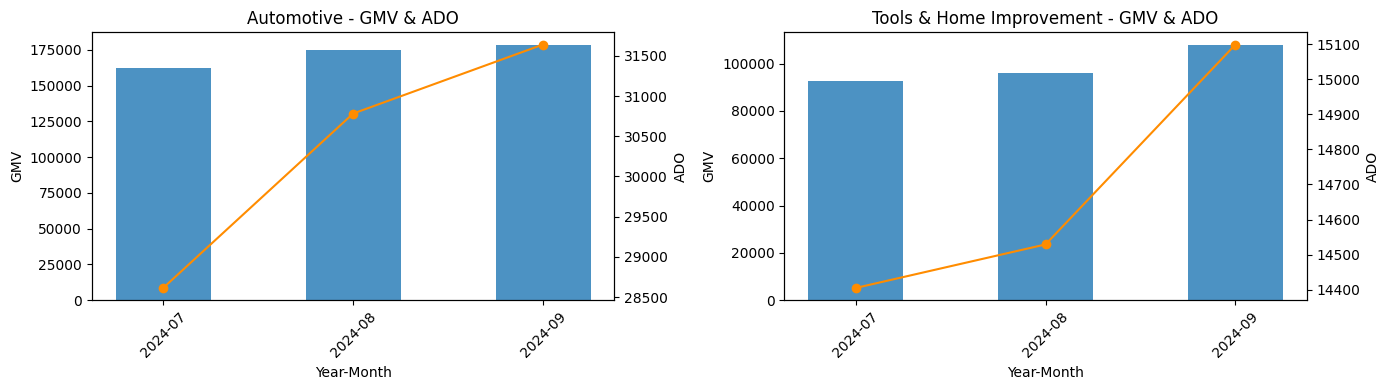

## PHẦN 2: PHÂN TÍCH ĐỘNG LỰC TĂNG TRƯỞNG 



### 2.1 Các ngành hàng đóng góp tăng trưởng chính:



**Về Automotive**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Helmets, Interior Accessories, Exterior Accessories**, đóng góp 123.4% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Helmets**: **mũ bảo hiểm nửa đầu** (+154.38 ADO), **mũ bảo hiểm lưỡi trai** (+123.47 ADO), **mũ bảo hiểm đai da** (+92.93 ADO)
 
  - **Interior Accessories**: **đỡ điện thoại ô tô** (+38.72 ADO), **bảng số điện thoại ô** (+31.69 ADO), **thảm lót sàn cao su** (+21.57 ADO)
 
  - **Exterior Accessories**: **combo 4 nắp van bánh** (+23.31 ADO), **nẹp decal bậc xe ô** (+22.23 ADO), **quây chống chuột xe ô** (+14.23 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Bike, E-bike, Interior Accessories, Exterior Accessories**), đóng góp 272.8% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **Bike, E-bike**: **xe đạp điện học sinh** (+1328.61 GMV), **xe đạp điện moka niceshine** (+795.04 GMV), **xe điện 3 bánh super** (+684.49 GMV)
 
  - **Interior Accessories**: **màn hình android ô tô** (+930.21 GMV), **thảm lót sàn ô tô** (+625.94 GMV), **thảm lót sàn cao su** (+361.62 GMV)
 
  - **Exterior Accessories**: **quây chống chuột xe ô** (+491.23 GMV), **quây chống chuột rào chắn** (+173.45 GMV), **bạt phủ ô tô xe** (+123.68 GMV)

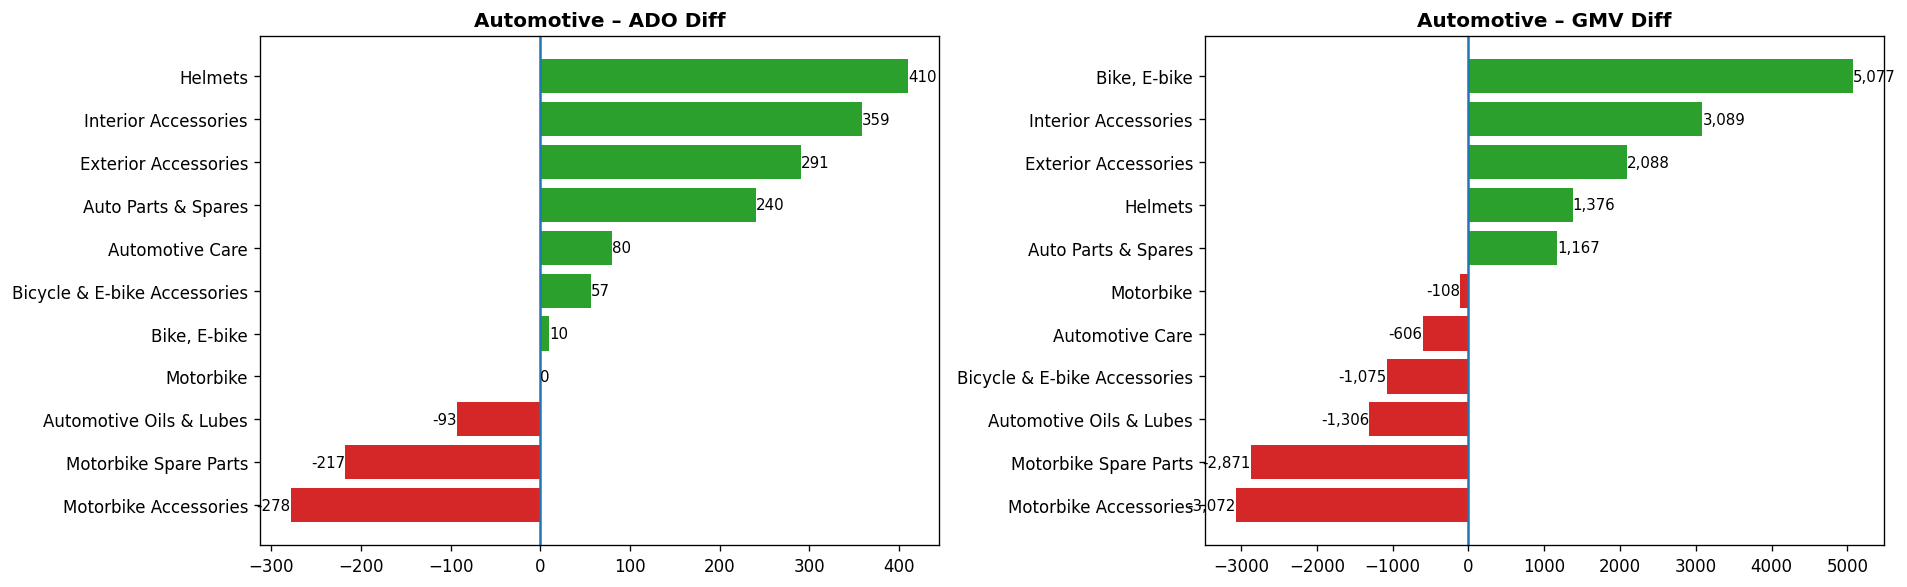

**Về Tools & Home Improvement**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Accessories, Building and construction, Handtool**, đóng góp 136.8% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Building and construction**: **xi măng dẻo bịt lỗ** (+86.14 ADO), **sàn nhựa giả gỗ sẵn** (+61.50 ADO), **sàn nhựa giả vân gỗ** (+21.72 ADO)
 
  - **Accessories**: **bộ sạc 4 pin aa** (+86.11 ADO), **băng keo điện nano dai** (+68.44 ADO), **keo dính đa năng mạnh** (+60.53 ADO)
 
  - **Handtool**: **máy siết bulong bs iw850n** (+22.70 ADO), **mũi khoan tháp 4 12** (+19.83 ADO), **cờ lê đa năng vặn** (+17.66 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Building and construction, Handtool, Accessories**), đóng góp 81.9% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **Building and construction**: **sàn nhựa giả gỗ sẵn** (+878.86 GMV), **sàn nhựa giả vân gỗ** (+365.99 GMV), **combo 1 36 sàn nhựa** (+283.12 GMV)
 
  - **Accessories**: **bộ sạc 4 pin aa** (+671.30 GMV), **năng lượng mặt trời mono** (+279.78 GMV), **combo 100 keo nến dài** (+181.90 GMV)
 
  - **Handtool**: **máy khoan đục bê tông** (+326.71 GMV), **máy siết bulong pin drama** (+245.16 GMV), **máy siết bulong de walt** (+218.34 GMV)

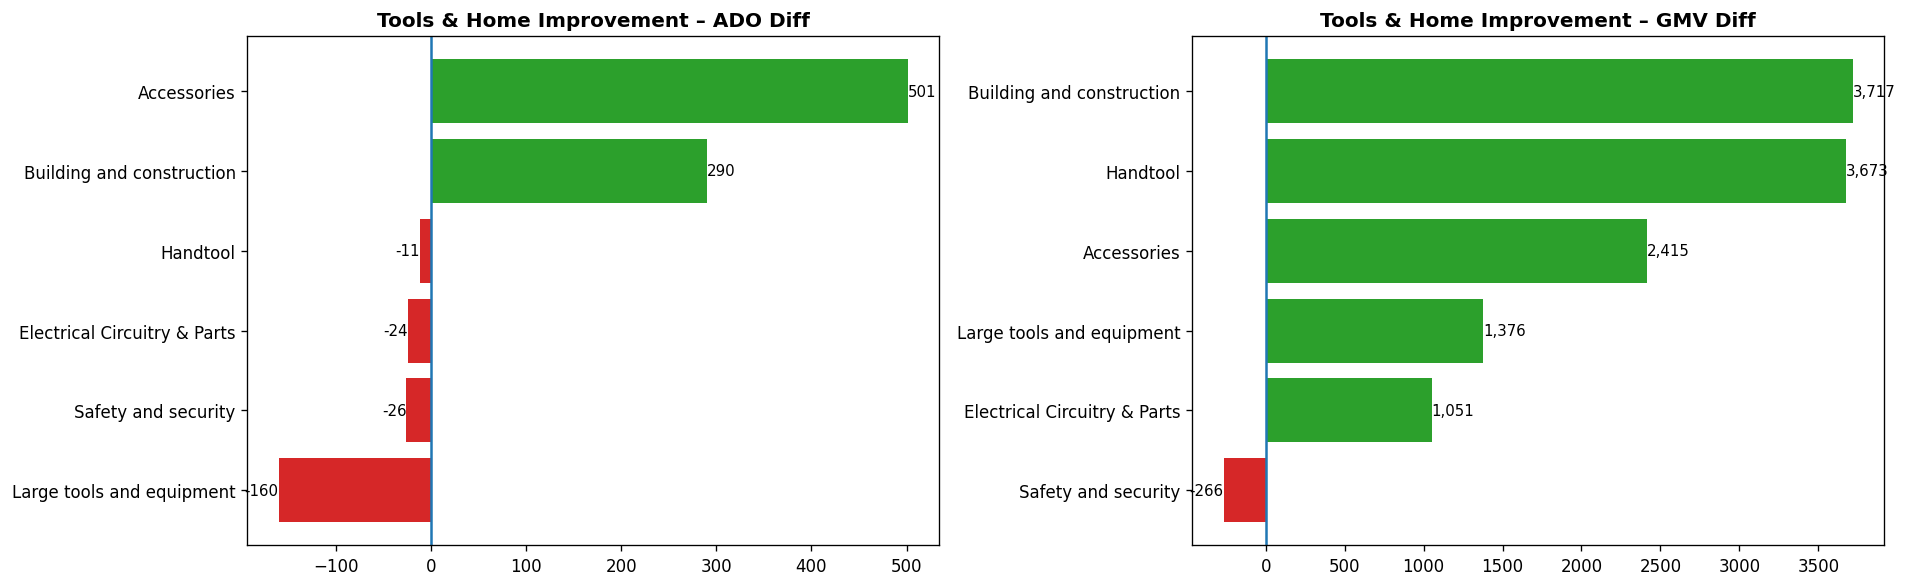

### 2.2 Các ngành hàng tăng trưởng âm:



**Về Automotive**
 
- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Motorbike Accessories, Motorbike Spare Parts, Automotive Oils & Lubes**, chiếm -68.5% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: 
 

 
  - **Motorbike Accessories**: **gương cờ việt nam gắn** (-17.64 ADO), **dè fi sirius 50 110** (-19.02 ADO), **gương 5 cạnh rizoma nhôm** (-43.97 ADO).
 
  - **Motorbike Spare Parts**: **gác chân đúc gcraft long** (-23.62 ADO), **đèn nháy audi stop cực** (-33.29 ADO), **cùm tăng tốc domino bao** (-36.19 ADO).
 
  - **Automotive Oils & Lubes**: **mỡ bò bảo dưỡng sên** (-2.94 ADO), **vệ sinh sên xích bảo** (-3.45 ADO), **mỡ tra bảo dưỡng xe** (-12.22 ADO).
 

- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Motorbike Accessories, Motorbike Spare Parts, Automotive Oils & Lubes**), chiếm -192.8% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: 
 

 
  - **Motorbike Accessories**: **gương gù crg chân gập** (-72.15 GMV), **gương 5 cạnh rizoma nhôm** (-84.69 GMV), **động cơ qs 3kv4 và** (-423.63 GMV).
 
  - **Motorbike Spare Parts**: **đèn pha bi cầu t40** (-113.40 GMV), **dàn áo bộ vỏ nhựa** (-160.17 GMV), **động cơ 5000w v4 12** (-177.38 GMV).
 
  - **Automotive Oils & Lubes**: **loa sub ghế mbq aw** (-14.33 GMV), **dầu nhớt xe máy castrol** (-16.91 GMV), **mỡ tra bảo dưỡng xe** (-29.24 GMV).

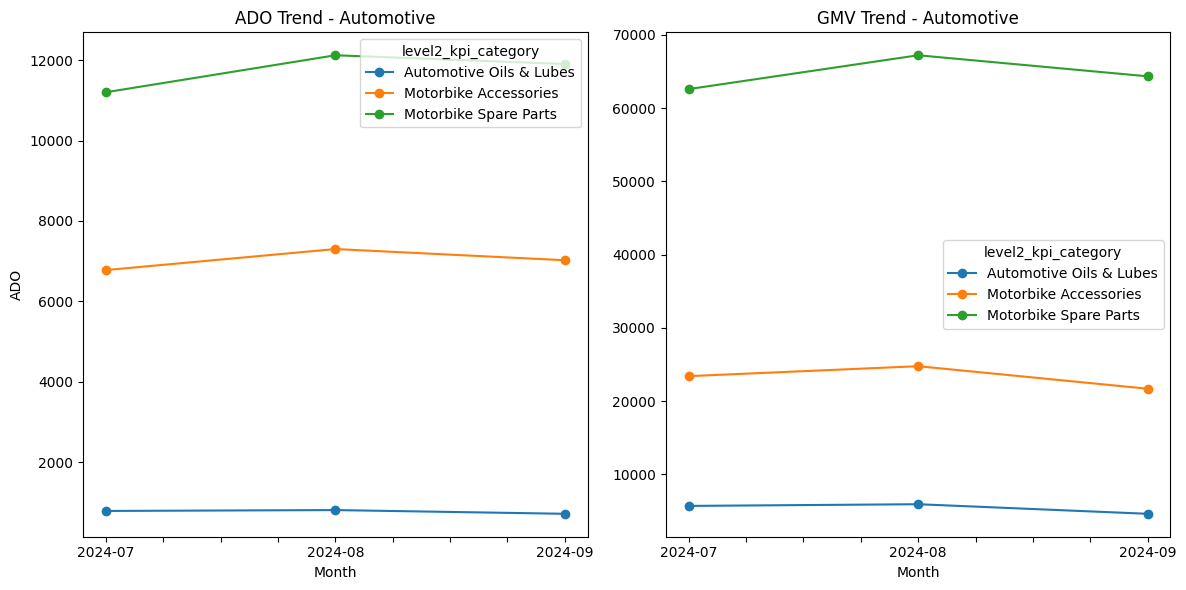

**Về Tools & Home Improvement**
 
- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Large tools and equipment, Safety and security, Electrical Circuitry & Parts**, chiếm -36.8% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: 
 

 
  - **Electrical Circuitry & Parts**: **mạch pin áo điều hòa** (-5.20 ADO), **tụ quạt trần điện 2** (-11.34 ADO), **công tắc điều khiển từ** (-23.88 ADO).
 
  - **Large tools and equipment**: **vòi tăng áp 3 homefl** (-5.27 ADO), **máy bơm tăng áp cao** (-5.95 ADO), **máy xe cầm tay pin** (-8.22 ADO).
 
  - **Safety and security**: **combo 2 cháy bột abc** (-1.72 ADO), **khóa chống cắt zsolex** (-1.79 ADO), **ổ khóa bấm việt nhật** (-2.44 ADO).
 

- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Safety and security**), chiếm -2.2% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: 
 

 
  - **Safety and security**: **combo 2 cháy 4kg cứu** (-29.53 GMV), **combo 2 cháy bột abc** (-35.29 GMV), **két sắt điện tử xiaomi** (-48.75 GMV).

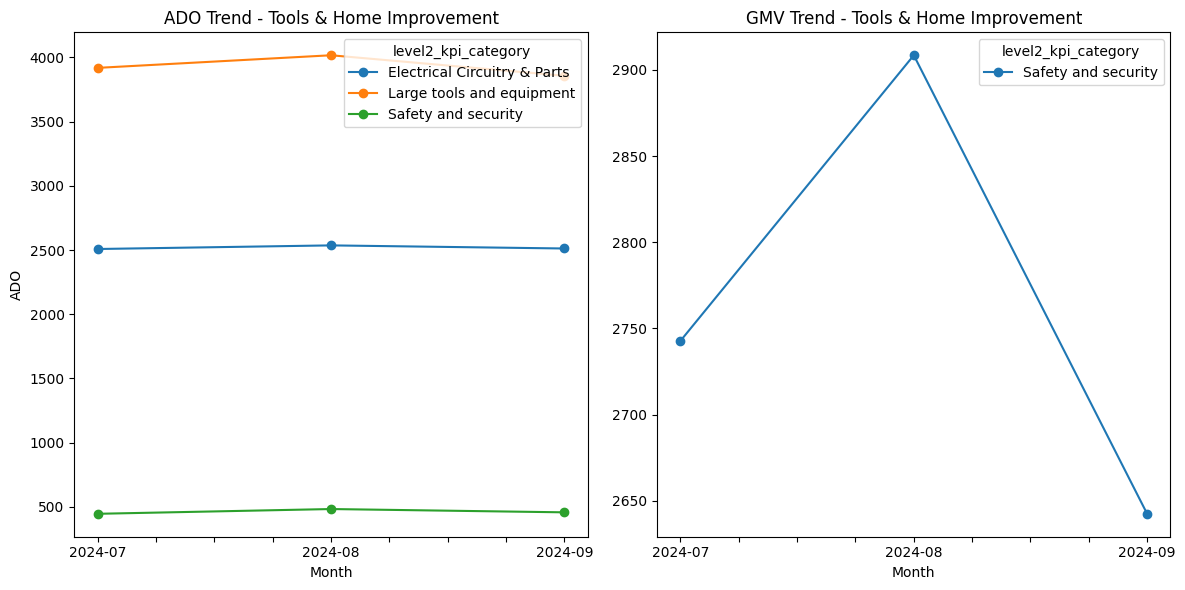

## PHẦN 3: CHẤT LƯỢNG TĂNG TRƯỞNG 



### 3.1 Tỷ trọng ADO & GMV theo ngành hàng cấp 2:



**Automotive**
 
 - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Auto Parts & Spares** (+0.67pp ADO và +0.58pp GMV), **Bike, E-bike** (+0.02pp ADO và +2.70pp GMV), **Exterior Accessories** (+0.83pp ADO và +1.10pp GMV), **Helmets** (+1.01pp ADO và +0.56pp GMV), **Interior Accessories** (+0.98pp ADO và +1.54pp GMV)
 
 - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Automotive Oils & Lubes** (-0.36pp ADO và -0.80pp GMV), **Motorbike Accessories** (-1.52pp ADO và -2.02pp GMV), **Motorbike Spare Parts** (-1.76pp ADO và -2.42pp GMV)
 
 - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** **Automotive Care** (+0.09pp ADO và -0.46pp GMV), **Bicycle & E-bike Accessories** (+0.04pp ADO và -0.70pp GMV), **Motorbike** (+0.00pp ADO và -0.07pp GMV)
 
 - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** 

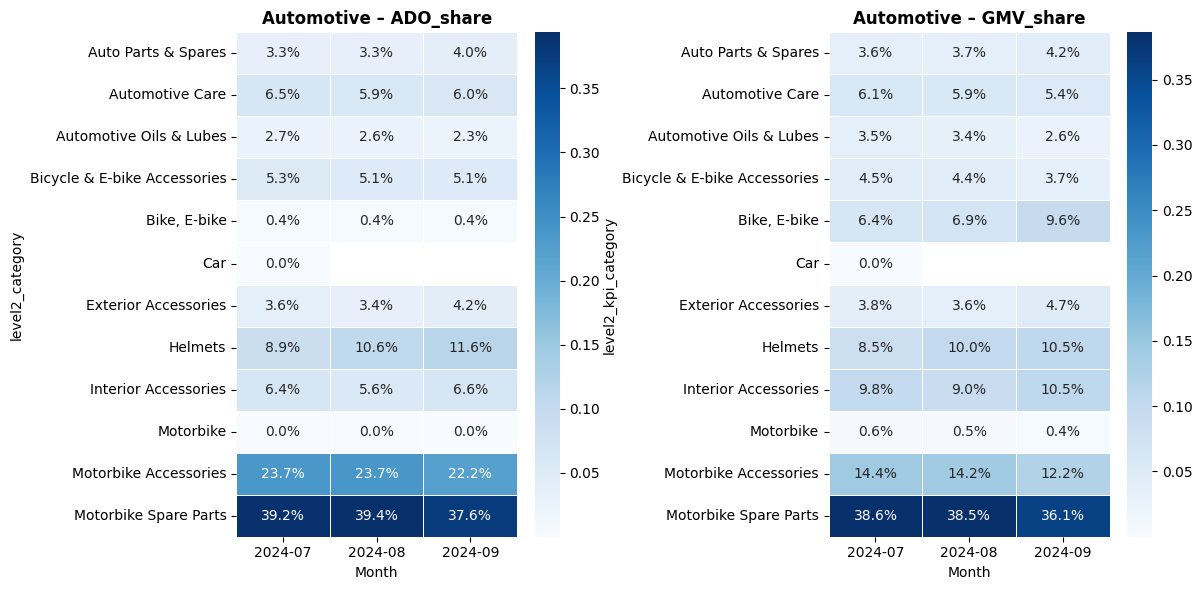

**Tools & Home Improvement**
 
 - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Accessories** (+2.57pp ADO và +0.72pp GMV), **Building and construction** (+1.60pp ADO và +2.06pp GMV)
 
 - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Electrical Circuitry & Parts** (-0.82pp ADO và -0.57pp GMV), **Large tools and equipment** (-2.10pp ADO và -2.60pp GMV), **Safety and security** (-0.30pp ADO và -0.58pp GMV)
 
 - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** 
 
 - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** **Handtool** (-0.95pp ADO và +0.97pp GMV)

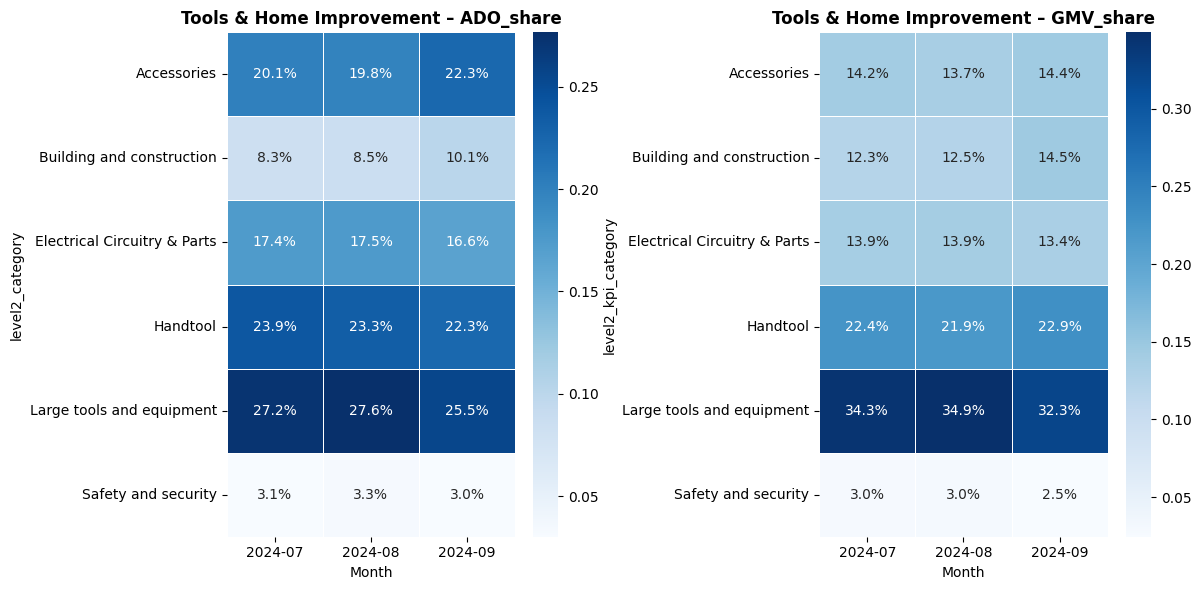

### 3.2 Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt :



**Automotive**
  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Helmets** (chiếm 11.58% cơ cấu ADO và tăng trưởng +12.61% MoM ), **Interior Accessories** (chiếm 6.60% cơ cấu ADO và tăng trưởng +20.79% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Interior Accessories** (chiếm 10.53% cơ cấu GMV và tăng trưởng +19.69% MoM ).

**Tools & Home Improvement**
  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Accessories** (chiếm 22.34% cơ cấu ADO và tăng trưởng +17.44% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Handtool** (chiếm 22.90% cơ cấu GMV và tăng trưởng +17.48% MoM ).

### 3.3 Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt:



**Automotive**
  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Auto Parts & Spares** (chiếm 3.97% cơ cấu ADO và tăng trưởng +23.61% MoM ), **Exterior Accessories** (chiếm 4.19% cơ cấu ADO và tăng trưởng +28.09% MoM ).
  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Bike, E-bike** (chiếm 9.63% cơ cấu GMV và tăng trưởng +42.02% MoM ), **Exterior Accessories** (chiếm 4.66% cơ cấu GMV và tăng trưởng +33.53% MoM ).

**Tools & Home Improvement**
  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Building and construction** (chiếm 10.13% cơ cấu ADO và tăng trưởng +23.44% MoM ).
  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Building and construction** (chiếm 14.53% cơ cấu GMV và tăng trưởng +31.11% MoM ).

### 3.4 Ngành hàng cấp 2 tỷ trọng lớn nhưng tăng trưởng chậm/giảm :



**Automotive**
  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Motorbike Accessories** (chiếm 22.19% cơ cấu ADO nhưng -3.81% MoM ), **Motorbike Spare Parts** (chiếm 37.62% cơ cấu ADO nhưng -1.79% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Motorbike Accessories** (chiếm 12.17% cơ cấu GMV nhưng -12.40% MoM ), **Motorbike Spare Parts** (chiếm 36.08% cơ cấu GMV nhưng -4.27% MoM ).

**Tools & Home Improvement**
  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Large tools and equipment** (chiếm 25.54% cơ cấu ADO nhưng -3.98% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Large tools and equipment** (chiếm 32.31% cơ cấu GMV nhưng +4.11% MoM ).

## PHẦN 4: XU HƯỚNG NGÀNH HÀNG 



### 4.1 Ngành hàng cấp 2 có xu hướng tăng :



**Automotive** 


 - **ADO**: Ngành hàng có xu hướng tăng **Auto Parts & Spares** (T8 +74.85 ADO, T9 +240.15 ADO), **Bicycle & E-bike Accessories** (T8 +32.97 ADO, T9 +56.94 ADO), **Bike, E-bike** (T8 +26.84 ADO, T9 +9.61 ADO), **Helmets** (T8 +696.89 ADO, T9 +410.23 ADO), **Motorbike** (T8 +0.16 ADO, T9 +0.02 ADO).
 - **GMV**: Ngành hàng có xu hướng tăng **Auto Parts & Spares** (T8 +522.06 GMV, T9 +1166.66 GMV), **Bike, E-bike** (T8 +1663.79 GMV, T9 +5077.19 GMV), **Exterior Accessories** (T8 +15.57 GMV, T9 +2088.19 GMV), **Helmets** (T8 +3572.13 GMV, T9 +1375.56 GMV).

**Tools & Home Improvement** 


 - **ADO**: Ngành hàng có xu hướng tăng **Building and construction** (T8 +38.68 ADO, T9 +290.34 ADO).
 - **GMV**: Ngành hàng có xu hướng tăng **Building and construction** (T8 +548.22 GMV, T9 +3716.92 GMV), **Electrical Circuitry & Parts** (T8 +508.24 GMV, T9 +1050.87 GMV), **Handtool** (T8 +253.21 GMV, T9 +3672.84 GMV), **Large tools and equipment** (T8 +1626.14 GMV, T9 +1376.46 GMV).

### 4.2 Ngành hàng cấp 2 có xu hướng giảm :



**Automotive** 


 - **ADO**: Không có ngành hàng nào có xu hướng giảm.


 - **GMV**: Ngành hàng có xu hướng giảm **Motorbike** (T8 -83.40 GMV, T9 -107.67 GMV).

 

**Tools & Home Improvement** 


 - **ADO**: Ngành hàng có xu hướng giảm **Handtool** (T8 -62.05 ADO, T9 -11.31 ADO).


 - **GMV**: Không có ngành hàng nào có xu hướng giảm. 

## PHẦN 5: XU HƯỚNG SẢN PHẨM 



### 5.1 Các sản phẩm có xu hướng tăng trong tháng gần nhất :



Xu hướng tăng theo ADO 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn trợ sáng bi cầu (+189), xi nhan chữ z trung (+91), 01 dây đèn led mí (+51), sạc ắc quy ô tô (+47), đèn led pha bi cầu (+30)"
1,Automotive,Automotive Care,"sơn mạ crom chrome sáng (+15), dung dịch đầu bò lốc (+14), đa năng moto cleaner sức (+13), sơn samurai nhám lót phủ (+12), phục hồi nhựa nhám dưỡng (+12)"
2,Automotive,Automotive Oils & Lubes,"hòa dyramid xăng con vệ (+43), nhớt fuchs silkolene pro 4 (+8), dung dịch vệ sinh buồng (+8), nhớt xe máy tora 20w50 (+6), nhớt tổng hợp kixx ultra (+5)"
3,Automotive,Bicycle & E-bike Accessories,"đèn trợ sáng xe máy (+55), bơm xe đạp áp suất (+34), đèn xe đạp thể thao (+25), bi sắt xe đạp 6 (+21), bộ tua vít đa năng (+19)"
4,Automotive,"Bike, E-bike","xe đạp thể thao 26inch (+6), đông xe đạp điện chữ (+2), xe đạp thể thao galaxy (+1), xe đạp thể thao amida (+1), xe đạp thể thao khung (+1)"
5,Automotive,Exterior Accessories,"đèn trợ sáng bi cầu (+189), bộ mô hình 6 con (+21), bộ 02 gioăng cột b (+17), quây chống chuột xe ô (+14), combo 4 đệm silicon chống (+13)"
6,Automotive,Helmets,"mũ bảo hiểm nửa đầu (+284), mũ bảo hiểm lưỡi trai (+182), nón bảo hiểm nửa đầu (+114), mũ bảo hiểm đai da (+93), mũ bảo hiểm trẻ em (+76)"
7,Automotive,Interior Accessories,"bộ mô hình 6 con (+21), rèm nắng ô tô chắn (+17), ổ cắm nguồn đầu tẩu (+16), bọc vô lăng ô tô (+14), cố định thảm lót sàn (+10)"
8,Automotive,Motorbike Accessories,"túi đầu xe máy đông (+100), chắn bùn cacbon cnc hàng (+72), 7 titan gắn xe máy (+70), inox và xi mạ 7 (+63), tay nắm tbt gù salaya (+58)"
9,Automotive,Motorbike Spare Parts,"đèn trợ sáng bi cầu (+189), bao tay daytonal gù salaya (+105), xi nhan chữ z trung (+91), combo hazard wave vision ab (+56), đèn led nháy audi xe (+55)"


Xu hướng tăng theo GMV 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn trợ sáng bi cầu (+468), sạc ắc quy ô tô (+465), ắc quy khô bảo dưỡng (+309), đèn pha led bi cầu (+246), 10 vít vá lốp xe (+148)"
1,Automotive,Automotive Care,"bộ kích nổ kiêm bơm (+346), dung dịch xe không chạm (+98), máy bơm lốp ô tô (+91), bộ kích nổ xe kiêm (+59), kích ô tô 2 tấn (+45)"
2,Automotive,Automotive Oils & Lubes,"nhớt fuchs silkolene pro 4 (+106), hòa dyramid xăng con vệ (+93), nhớt motul 7100 10w40 1l (+48), nhớt tổng hợp kixx ultra (+41), dầu nhớt xe máy hulotoil (+40)"
3,Automotive,Bicycle & E-bike Accessories,"ic đúc 1500w bản mạnh (+132), sạc xe đạp điện máy (+107), bi sắt xe đạp 6 (+97), đèn xe đạp thể thao (+88), khoá dây 5 số xe (+57)"
4,Automotive,"Bike, E-bike","xe đạp thể thao 26inch (+499), xe đạp điện trợ lực (+241), xe đạp thể thao galaxy (+146), xe đạp thể thao california (+124), xe đạp touring thống nhất (+101)"
5,Automotive,Exterior Accessories,"quây chống chuột xe ô (+493), bạt phủ ô tô áo (+113), bộ 02 gioăng cột b (+57), bậc nẹp bước chân xe (+36), combo 4 đệm silicon chống (+31)"
6,Automotive,Helmets,"mũ bảo hiểm nửa đầu (+1,242), nón bảo hiểm nửa đầu (+539), mũ bảo hiểm napoli n120 (+416), mũ bảo hiểm napoli nửa (+409), mũ bảo hiểm lưỡi trai (+389)"
7,Automotive,Interior Accessories,"camera hành trình 70mai dash (+434), thảm lót sàn nhựa 5d (+326), camera hành trình 70mai a500s (+199), lót ghế ô tô hạt (+168), rèm nắng ô tô chắn (+138)"
8,Automotive,Motorbike,xe máy yamaha janus phiên (+426)
9,Automotive,Motorbike Accessories,"chắn bùn cacbon cnc hàng (+346), túi đầu xe máy đông (+338), tay nắm tbt gù salaya (+99), bộ nhựa 8 món xmen (+98), gương chiếu h2c chân ngắn (+95)"


### 5.2 Các sản phẩm có xu hướng giảm trong tháng gần nhất:



Xu hướng giảm theo ADO 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"đèn led cảnh báo nguy (+3), bộ 2 kẹp ắc quy (+2), cáp đấu trực tiếp điện (+2), bộ vá lốp không săm (+2), 10 đinh vít vá lốp (+2)"
1,Automotive,Automotive Care,"kem autosol metal polish dùng (+23), vết ố kính vế bẩn (+14), khăn lau 2 mặt ô (+8), combo phục hồi nhựa nhám (+7), dung dịch moto cleaner vệ (+6)"
2,Automotive,Automotive Oils & Lubes,"dầu nhớt xe tay ga (+11), vệ sinh sên xích bảo (+9), dầu nhớt xe số motul (+4), dung dịch mát động cơ (+4), rp7 chống rỉ sét 350g (+3)"
3,Automotive,Bicycle & E-bike Accessories,"yên xe đạp thể thao (+9), 700 bi 7mm chống rỉ (+8), bánh xe đạp trẻ em (+4), đổi nguồn từ 36v 72v (+3), yên xe đạp active chống (+3)"
4,Automotive,"Bike, E-bike","yên xe đạp thể thao (+9), xe đạp nữ califa misa (+1), xe đạp nữ wahama phoenix (+1)"
5,Automotive,Exterior Accessories,"bộ khung biển số mica (+21), tem đổi đèn hyundai accent (+11), bộ 16 nút chấn ô (+8), decal đèn xpander logo (+8), decal phản quang 3m mặt (+3)"
6,Automotive,Helmets,"royal helmet mũ bảo hiểm (+6), kính phi công uv trang (+5), mũ bảo hiểm bé từ (+4), mũ bảo hiểm khủng long (+4), tai mèo hoa sừng chong (+4)"
7,Automotive,Interior Accessories,"rèm nắng theo xe hút (+7), sáp thơm areon car247 ken (+5), thảm taplo da cacbon ô (+4), đệm ô tô nệm xe (+4), rèm nắng xe ô tô (+3)"
8,Automotive,Motorbike Accessories,"bao tay daytona hàng 1 (+26), bao tay daytona hàng pháp (+17), combo chân kính xoay 360 (+13), combo dè fi hello nạ (+11), gương 5 cạnh rizoma hàng (+10)"
9,Automotive,Motorbike Spare Parts,"đèn nháy audi stop cực (+60), đèn led nháy audi 64 (+50), gác chân đúc gcraft long (+32), bộ khung biển số mica (+21), combo đông trung quốc xe (+12)"


Xu hướng giảm theo GMV 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Automotive,Auto Parts & Spares,"lọc gió điều hòa máy (+25), đèn led cảnh báo nguy (+24), ty thủy lực ben dài (+17), gạt mưa xe ô tô (+13), gạt mưa xương phổ thông (+8)"
1,Automotive,Automotive Care,"kem autosol metal polish dùng (+53), kính ô tô sunnyclean (+51), khăn lau ô tô xe (+27), kính ô tô sunny clean (+22), tời điện ác quy 5000lbs (+21)"
2,Automotive,Automotive Oils & Lubes,"dầu nhớt xe tay ga (+77), vệ sinh sên xích bảo (+31), dầu nhớt xe số motul (+22), dung dịch vệ sinh sạch (+14), dầu nhớt motul h tech (+13)"
3,Automotive,Bicycle & E-bike Accessories,"bộ tay lắc l twoo (+321), yên xe đạp thể thao (+36), bơm xe đạp chân kirito (+16), yên xe đạp active chống (+15), đồng hồ không dây cycplus (+15)"
4,Automotive,"Bike, E-bike","xe đạp nữ califa misa (+64), xe đạp nữ wahama phoenix (+53), xe đạp trẻ em nữ (+29), xe đạp đua galaxy rl420 (+16)"
5,Automotive,Exterior Accessories,"tem đổi đèn hyundai accent (+53), decal đèn xpander logo (+37), bộ khung biển số mica (+29), tem quây chống chuột ô (+19), decal mâm vinfast vf5 thanh (+17)"
6,Automotive,Helmets,"royal helmet mũ bảo hiểm (+73), mũ bảo hiểm khủng long (+26), mũ bảo hiểm bé từ (+15), nón bảo hiểm royal m141k (+13), mũ bảo hiểm fullface lật (+11)"
7,Automotive,Interior Accessories,"rèm nắng theo xe hút (+61), đệm ô tô nệm xe (+45), rèm nắng xe ô tô (+34), giường đệm gấp gọn xe (+30), nệm để xe ô tô (+27)"
8,Automotive,Motorbike Accessories,"bộ điều khiển 80s 2000 (+68), combo dè fi hello nạ (+53), combo chân kính xoay 360 (+49), gương 5 cạnh rizoma hàng (+33), xe máy kiểu givi gắn (+31)"
9,Automotive,Motorbike Spare Parts,"dàn áo bộ vỏ nhựa (+163), combo đông trung quốc xe (+90), gác chân đúc gcraft long (+86), yếm bửng sirius tdh 50 (+65), yếm sirius 50 110 tdh (+48)"


In [ ]:
from IPython.display import Markdown, display

# ===== SECTION 1: TỔNG QUAN =====
section_summary = []

section_summary.append("## PHẦN 1: TỔNG QUAN \n\n")
section_summary.append(
    f"\n \n Ngành hàng **Auto & Tools** {cur_month} so với {last_month} "
    f"{growth_lable(diff_ado_overall)} {format_num(diff_ado_overall)} về ADO "
    f"({format_pct(grow_ado_overall)} MoM) và "
    f"{growth_lable(diff_gmv_overall)} {format_num(diff_gmv_overall)} về GMV "
    f"({format_pct(grow_gmv_overall)} MoM)."
)
texts_l1
section_summary.append("\n**Trong đó:**")
for t in texts_l1:
    section_summary.append(f"- {t}")

display(Markdown("\n\n".join(section_summary)+'\n\n'))

# Chart ADO/GMV theo level 1
plot_gmv_ado_dual_chart(l1_by_month)

# ===== SECTION 2: LEVEL 2 INSIGHT =====

display(Markdown("## PHẦN 2: PHÂN TÍCH ĐỘNG LỰC TĂNG TRƯỞNG \n\n"))

display(Markdown(
    "### 2.1 Các ngành hàng đóng góp tăng trưởng chính:\n\n"
))

# Tăng trưởng Auto
insight_text_1 = insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1='Automotive'
    )
display(Markdown(insight_text_1))
plot_cat(df_auto,'Automotive')

# Tăng trưởng Tool
insight_text_2 = insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1='Tools & Home Improvement'
    )
display(Markdown(insight_text_2))

plot_cat(df_tool,'Tools & Home Improvement')

display(Markdown("### 2.2 Các ngành hàng tăng trưởng âm:\n\n"))

# Insight text
insight_text_3= insight_low_ado_gmv_items(
                                          contrib_ado_df= df_lowest_l2_ado,
                                          contrib_gmv_df= df_lowest_l2_gmv,
                                          df_ado= top3_items_low_ado,
                                          df_gmv = top3_items_low_gmv,
                                          lvl1="Automotive"
                                        )

display(Markdown(insight_text_3))

plot_trend_cat(auto_trend_ado,auto_trend_gmv,'Automotive')

insight_text_4= insight_low_ado_gmv_items(
                                          contrib_ado_df= df_lowest_l2_ado,
                                          contrib_gmv_df= df_lowest_l2_gmv,
                                          df_ado= top3_items_low_ado,
                                          df_gmv = top3_items_low_gmv,
                                          lvl1="Tools & Home Improvement"
                                        )
display(Markdown(insight_text_4))

plot_trend_cat(tool_trend_ado,tool_trend_gmv,"Tools & Home Improvement")

#===== SECTION 3: QUANTITY GROWTH ========
display(Markdown("## PHẦN 3: CHẤT LƯỢNG TĂNG TRƯỞNG \n\n"))
# Tỷ trọng
display(Markdown(
    "### 3.1 Tỷ trọng ADO & GMV theo ngành hàng cấp 2:\n\n"
))
insight_text_5 = tag_share(total_share,"Automotive")
display(Markdown(insight_text_5))
# Chart
plot_heatmap_share(
    total_share,
    lv1='Automotive'
)

insight_text_6 = tag_share(total_share,"Tools & Home Improvement")
display(Markdown(insight_text_6))
# Chart
plot_heatmap_share(
    total_share,
    lv1='Tools & Home Improvement'
)
# Tăng trưởng tốt và tỷ trọng cao
display(Markdown(
    "### 3.2 Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt :\n\n"
))
insight_text_7 = quantile_share_diff(df_merge_share,'Automotive')

display(Markdown("\n".join(insight_text_7)))

insight_text_8 = quantile_share_diff(df_merge_share,'Tools & Home Improvement')

display(Markdown("\n".join(insight_text_8)))

# Tăng trưởng tốt và tỷ trọng nhỏ
display(Markdown(
    "### 3.3 Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt:\n\n"
))
insight_text_9 = quantile_share_diff_2(df_merge_share,'Automotive')
display(Markdown("\n".join(insight_text_9)))

insight_text_10 = quantile_share_diff_2(df_merge_share,'Tools & Home Improvement')
display(Markdown("\n".join(insight_text_10)))

# Tăng trưởng âm và tỷ trọng nhỏ
display(Markdown(
    "### 3.4 Ngành hàng cấp 2 tỷ trọng lớn nhưng tăng trưởng chậm/giảm :\n\n"
))
insight_text_11 = quantile_share_diff_3(df_merge_share,'Automotive')
display(Markdown("\n".join(insight_text_11)))

insight_text_12 = quantile_share_diff_3(df_merge_share,'Tools & Home Improvement')
display(Markdown("\n".join(insight_text_12)))

#===== SECTION 4: TRENDING CAT LEVEL 2 ========
display(Markdown("## PHẦN 4: XU HƯỚNG NGÀNH HÀNG \n\n"))

display(Markdown(
    "### 4.1 Ngành hàng cấp 2 có xu hướng tăng :\n\n"
))
insight_text_13 =trend_grow(df_lv2_gr_month,"Automotive")
display(Markdown("\n".join(insight_text_13)))

insight_text_14 =trend_grow(df_lv2_gr_month,"Tools & Home Improvement")
display(Markdown("\n".join(insight_text_14)))

display(Markdown(
    "### 4.2 Ngành hàng cấp 2 có xu hướng giảm :\n\n"
))
insight_text_15 =trend_down(df_lv2_gr_month,"Automotive")
display(Markdown("\n".join(insight_text_15)))

insight_text_16 =trend_down(df_lv2_gr_month,"Tools & Home Improvement")
display(Markdown("\n".join(insight_text_16)))

#===== SECTION 5: TRENDING ITEMS ========

display(Markdown("## PHẦN 5: XU HƯỚNG SẢN PHẨM \n\n"))

display(Markdown(
    "### 5.1 Các sản phẩm có xu hướng tăng trong tháng gần nhất :\n\n"
))
display(Markdown("Xu hướng tăng theo ADO \n\n"))
display(table_view_grow(items_trend_grow_ado))

display(Markdown("Xu hướng tăng theo GMV \n\n"))
display(table_view_grow(items_trend_grow_gmv))


display(Markdown(
    "### 5.2 Các sản phẩm có xu hướng giảm trong tháng gần nhất:\n\n"
))

display(Markdown("Xu hướng giảm theo ADO \n\n"))
display(table_view_down(items_trend_down_ado))

display(Markdown("Xu hướng giảm theo GMV \n\n"))
display(table_view_down(items_trend_down_gmv))
